# Film Casus

Welkom bij het onderzoek van Team 1! 

- Gemaakt door Yula, Joel en Pim.

## Introduction 

In dit project gaan wij 2 filmdatasets onderzoeken. 

Voor dat we gaan beginnen gaan we eerst nog **data begrijpen** en **data voorbereiden**.

We beantwoorden in totaal 3 onderzoeksvragen：
1. In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB？
2. Is het mogelijk om te voorspellen of een film een oscar zal winnen of niet?
3. Hoe kunnen budget en omzet worden gebruikt om logische clusters van de films te vinden?

## Data Understanding

**Alle imports**

In [251]:
import functies as fn
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
from sklearn.mixture import GaussianMixture as gmm
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
import plotly.io as pio
from ipywidgets import interact, widgets

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


**Laad de dataset**

In [252]:
dfr = pd.read_csv('data/movie-1.csv')

# Toon de maximale informatie die de dataframe kan geven.
pd.set_option('display.max_columns', None)

# Formatteer alle grote getallen voor een betere leesbaarheid.
pd.set_option('display.float_format', '{:,.2f}'.format)

**Kopie van de dataset**


Een kopie van de gegevens maken om mee te werken,
zodat we het oorspronkelijke dataset niet wijzigen.

In [253]:
df = dfr.copy()

**Een kijkje nemen naar de gegevens die we hebben gekregen.**

In [254]:
df.head(5)

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                  723.00    178.00   
1  Color     Gore Verbinski                  302.00    169.00   
2  Color         Sam Mendes                  602.00    148.00   
3  Color  Christopher Nolan                  813.00    164.00   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                     0.00                  855.00  Joel David Moore   
1                   563.00                1,000.00     Orlando Bloom   
2                     0.00                  161.00      Rory Kinnear   
3                22,000.00               23,000.00    Christian Bale   
4                   131.00                     NaN        Rob Walker   

   actor_1_facebook_likes          gross                           genres  \
0                1,000.00 760,505,847.00  Action|Adventure|Fantasy|Sci-Fi   
1               40,000.00 309,404,152.00         Action|Adventure|Fantasy   
2               11,000.00 200,074,175.00        Action|Adventure|Thriller   
3               27,000.00 448,130,642.00                  Action|Thriller   
4                  131.00            NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                  0.00             avatar|future|marine|native|paraplegic   
1                  0.00  goddess|marriage ceremony|marriage proposal|pi...   
2                  1.00                bomb|espionage|sequel|spy|terrorist   
3                  0.00  deception|imprisonment|lawlessness|police offi...   
4                  0.00                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...              3,054.00   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...              1,238.00   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                994.00   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...              2,701.00   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating         budget  title_year  \
0  English     USA          PG-13 237,000,000.00    2,009.00   
1  English     USA          PG-13 300,000,000.00    2,007.00   
2  English      UK          PG-13 245,000,000.00    2,015.00   
3  English     USA          PG-13 250,000,000.00    2,012.00   
4      NaN     NaN            NaN            NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                  936.00        7.90          1.78                 33000  
1                5,000.00        7.10          2.35                     0  
2                  393.00        6.80          2.35                 85000  
3               23,000.00        8.50          2.35                164000  
4                   12.00        7.10           NaN                     0

**Haal de kolomnamen op om te zien met wat voor soort variabelen we werken**

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Meetniveaus

In [256]:
#  alle meetniveaus in datafeame zetten
data = {
    "Nominaal": [
        "actor_1_name", "actor_2_name", "actor_3_name", "color", "country",
        "director_name", "genres", "language", "movie_imdb_link", "movie_title", "plot_keywords"
    ],
    "Ordinaal": ["content_rating"],
    "Discreet": [
        "facenumber_in_poster", "num_critic_for_reviews", "num_user_for_reviews",
        "num_voted_users", "title_year"
    ],
    "Continu": [
        "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes",
        "aspect_ratio", "budget", "cast_total_facebook_likes", "director_facebook_likes",
        "duration", "gross", "imdb_score", "movie_facebook_likes"
    ]
}

meetniveaus = pd.DataFrame.from_dict(data, orient='index').transpose()

print(meetniveaus)

           Nominaal        Ordinaal                Discreet  \
0      actor_1_name  content_rating    facenumber_in_poster   
1      actor_2_name            None  num_critic_for_reviews   
2      actor_3_name            None    num_user_for_reviews   
3             color            None         num_voted_users   
4           country            None              title_year   
5     director_name            None                    None   
6            genres            None                    None   
7          language            None                    None   
8   movie_imdb_link            None                    None   
9       movie_title            None                    None   
10    plot_keywords            None                    None   

                      Continu  
0      actor_1_facebook_likes  
1      actor_2_facebook_likes  
2      actor_3_facebook_likes  
3                aspect_ratio  
4                      budget  
5   cast_total_facebook_likes  
6     director_face

## Data Preparation

**Doel- en kenmerkenvariabelen**


De target variabel is al gegeven, namelijk de 'gross' kolom.

De gross is afhankelijk van de feature variables, die zijn onafhankelijk.

We hebben gekozen voor deze feature variabelen omdat deze kolommen het best passen bij onze onderzoeksvraag. 

We moeten het voorspellen aan de hand van de populariteit van facebook en IMDB. Ofwel de statistieken van deze 2.

In [257]:
featureVariables = ['director_facebook_likes', 
                    'actor_1_facebook_likes', 
                    'actor_2_facebook_likes', 
                    'actor_3_facebook_likes', 
                    'cast_total_facebook_likes', 
                    'movie_facebook_likes', 
                    'imdb_score']

targetVariable = ['gross']

**Maak een andere dataframe met alleen de kolommen waarin we geïnteresseerd zijn voor vraag 1.**


In [258]:
df_vraag1 = df[featureVariables + targetVariable]

**Controleer NaN-waarden**

Verwijder voorlopig alle NaN-waarden in de kenmerken- en doelvariabelen. Later zullen we verder onderzoeken hoe we deze op de juiste manier kunnen verwerken.

In [259]:
df_vraag1.isna().sum()

director_facebook_likes      104
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
imdb_score                     0
gross                        884
dtype: int64

We zullen alle NaN-waarden verwijderen. We kunnen ze niet vervangen, omdat de meerderheid onze doelvariabele bevat.

In [260]:
print(df.shape) #check impact
df_vraag1 = df.dropna()
print(df_vraag1.shape) #check impact

(5043, 28)
(3755, 28)


**Nu zullen we alle kolommen analyseren om te controleren op anomalieën.**

In [261]:
df_vraag1.describe()

num_critic_for_reviews  duration  director_facebook_likes  \
count                3,755.00  3,755.00                 3,755.00   
mean                   167.39    110.26                   807.46   
std                    123.47     22.65                 3,068.57   
min                      2.00     37.00                     0.00   
25%                     77.00     96.00                    11.00   
50%                    139.00    106.00                    64.00   
75%                    224.00    120.00                   235.00   
max                    813.00    330.00                23,000.00   

       actor_3_facebook_likes  actor_1_facebook_likes          gross  \
count                3,755.00                3,755.00       3,755.00   
mean                   771.48                7,753.39  52,626,142.74   
std                  1,894.46               15,520.90  70,322,493.81   
min                      0.00                    0.00         162.00   
25%                    194.50                  745.00   8,301,882.50   
50%                    436.00                1,000.00  30,093,107.00   
75%                    691.00               13,000.00  66,901,813.50   
max                 23,000.00              640,000.00 760,505,847.00   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count         3,755.00                   3,755.00              3,755.00   
mean        105,848.94                  11,530.16                  1.38   
std         152,049.56                  19,123.81                  2.04   
min              91.00                       0.00                  0.00   
25%          19,663.00                   1,920.50                  0.00   
50%          53,977.00                   4,060.00                  1.00   
75%         128,611.00                  16,243.00                  2.00   
max       1,689,764.00                 656,730.00                 43.00   

       num_user_for_reviews            budget  title_year  \
count              3,755.00          3,755.00    3,755.00   
mean                 336.91     46,248,097.80    2,002.97   
std                  411.26    226,039,337.62        9.89   
min                    4.00            218.00    1,927.00   
25%                  110.00     10,000,000.00    1,999.00   
50%                  210.00     25,000,000.00    2,004.00   
75%                  398.50     50,000,000.00    2,010.00   
max                5,060.00 12,215,500,000.00    2,016.00   

       actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
count                3,755.00    3,755.00      3,755.00              3,755.00  
mean                 2,022.31        6.46          2.11              9,349.40  
std                  4,545.39        1.06          0.35             21,464.03  
min                      0.00        1.60          1.18                  0.00  
25%                    385.00        5.90          1.85                  0.00  
50%                    686.00        6.60          2.35                227.00  
75%                    976.00        7.20          2.35             11,000.00  
max                137,000.00        9.30         16.00            349,000.00

Alle statistieken zien er schoon uit.

Alle kolommen met 'namen' bevatten NaN en getallen waar dit verwacht wordt.

Alle kolommen met 'likes' bevatten NaN en een getal waar dit verwacht wordt. Ook geen vreemde minimale of maximale waarden.

De kolom 'imdb_score' heeft alleen waarden tussen 0 en 10, wat verwacht wordt.

En tot slot heeft de kolom 'gross' een natuurlijke orde van grootte van min tot max.

### TargetVariable met histogram

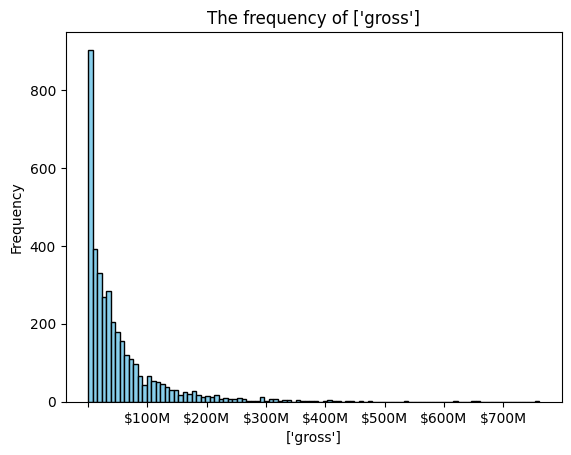

In [262]:
fn.histogram_gross(df_vraag1,targetVariable)

Deze histogram laat zien hoe vaak verschillende filmomzetten voorkomen. De meeste films verdienen minder dan $100 miljoen, terwijl slechts een paar films veel meer verdienen.

### TargetVariable met boxplot

We zullen geen van de uitschieters uit onze doelvariabele 'gross' verwijderen. Voor onze kenmerkenvariabelen zijn er echter enkele vreemde uitschieters en veel regisseurs en acteurs met 0 likes op Facebook. 

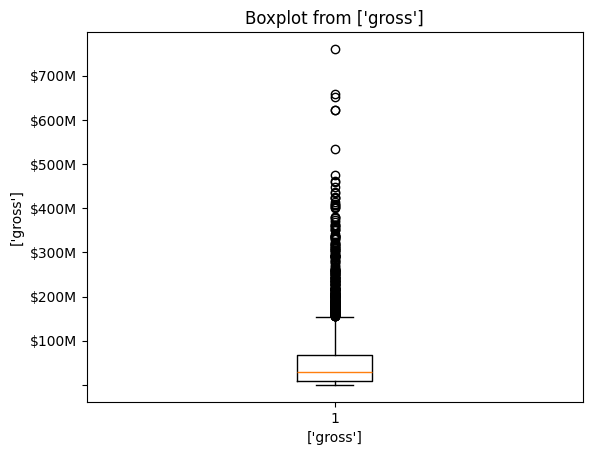

In [263]:
fn.boxplot_gross_and_budget(df_vraag1,targetVariable)

Deze boxplot van gross laat ook zien dat de meeste films een omzet hebben onder de 100 miljoen, maar er zijn veel uitschieters met een veel hogere omzet, tot boven $700 miljoen.

### FeatureVariables met histogram

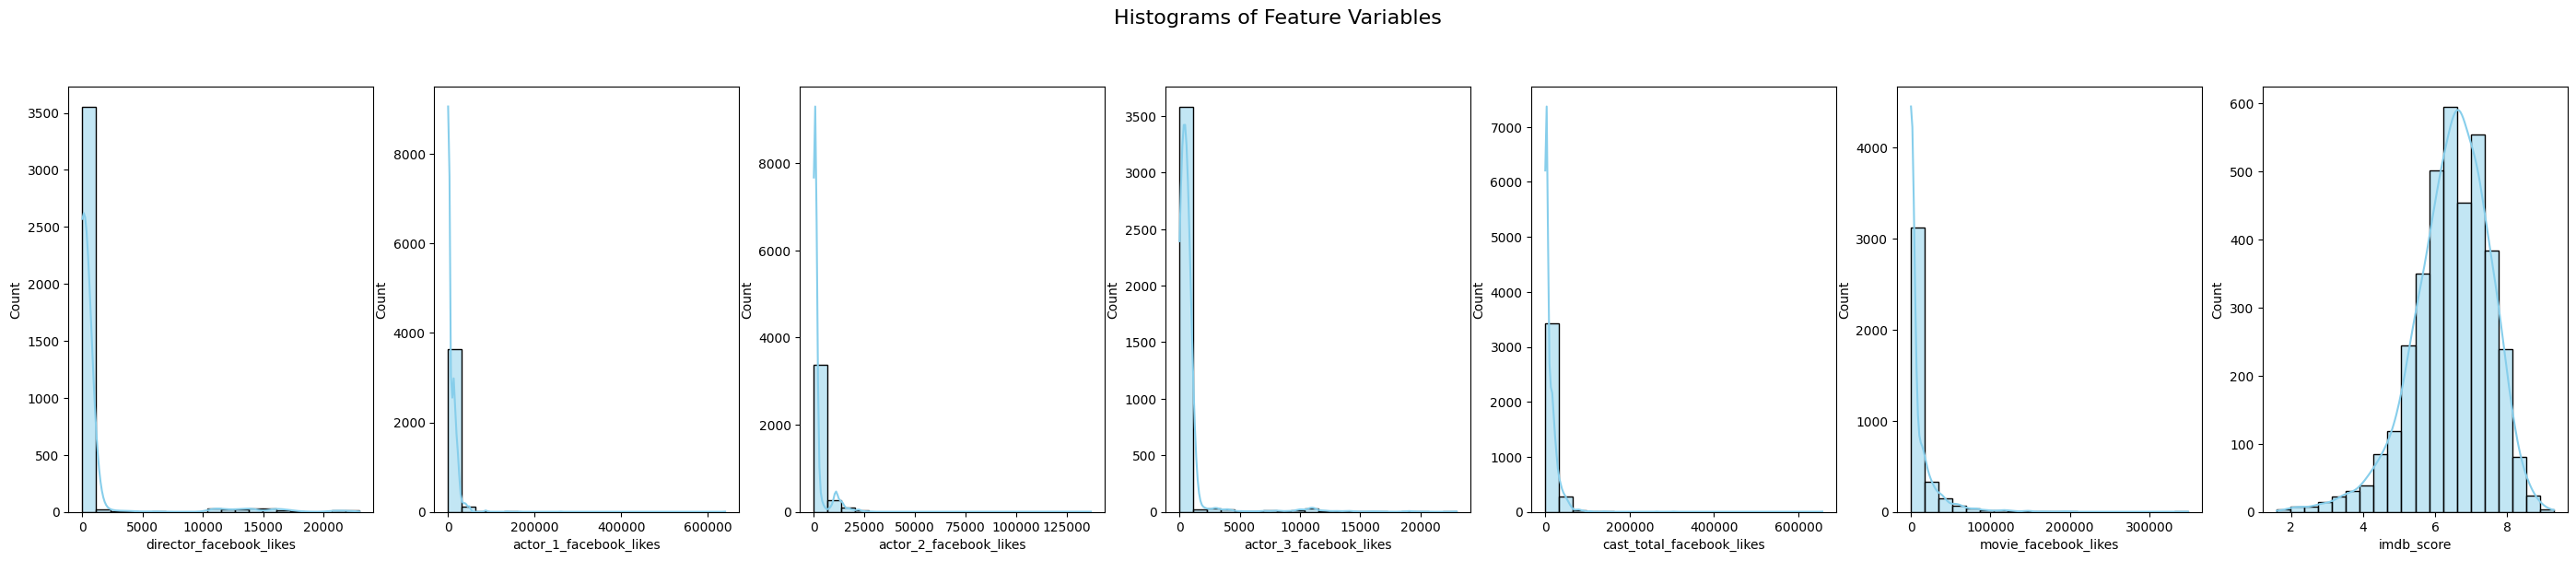

In [264]:
fn.plot_histograms(df_vraag1, featureVariables)

**imdb_score**

De verdeling van deze featureVariabele is relatief normaal verdeeld, wat betekent dat de meeste films een IMDb-score tussen 5 en 7 hebben.

**Andere Variabelen met likes**

Veel van deze featureVariabelen hebben een scheve verdeling, waarbij de meeste films weinig likes hebben en een paar films veel likes. Dit kan zijn door hele bekende regisseurs en acteurs in bepaald films.

### Featurevariables met boxplots en uitschieters

Er is aanzienlijk veel variatie tussen alle feature variabelen. Wij verwachten dat films met een hoge like-score op alle gebieden, hoger zullen scoren in hun omzet. Dus Wij zullen geen uitschieters verwijderen.

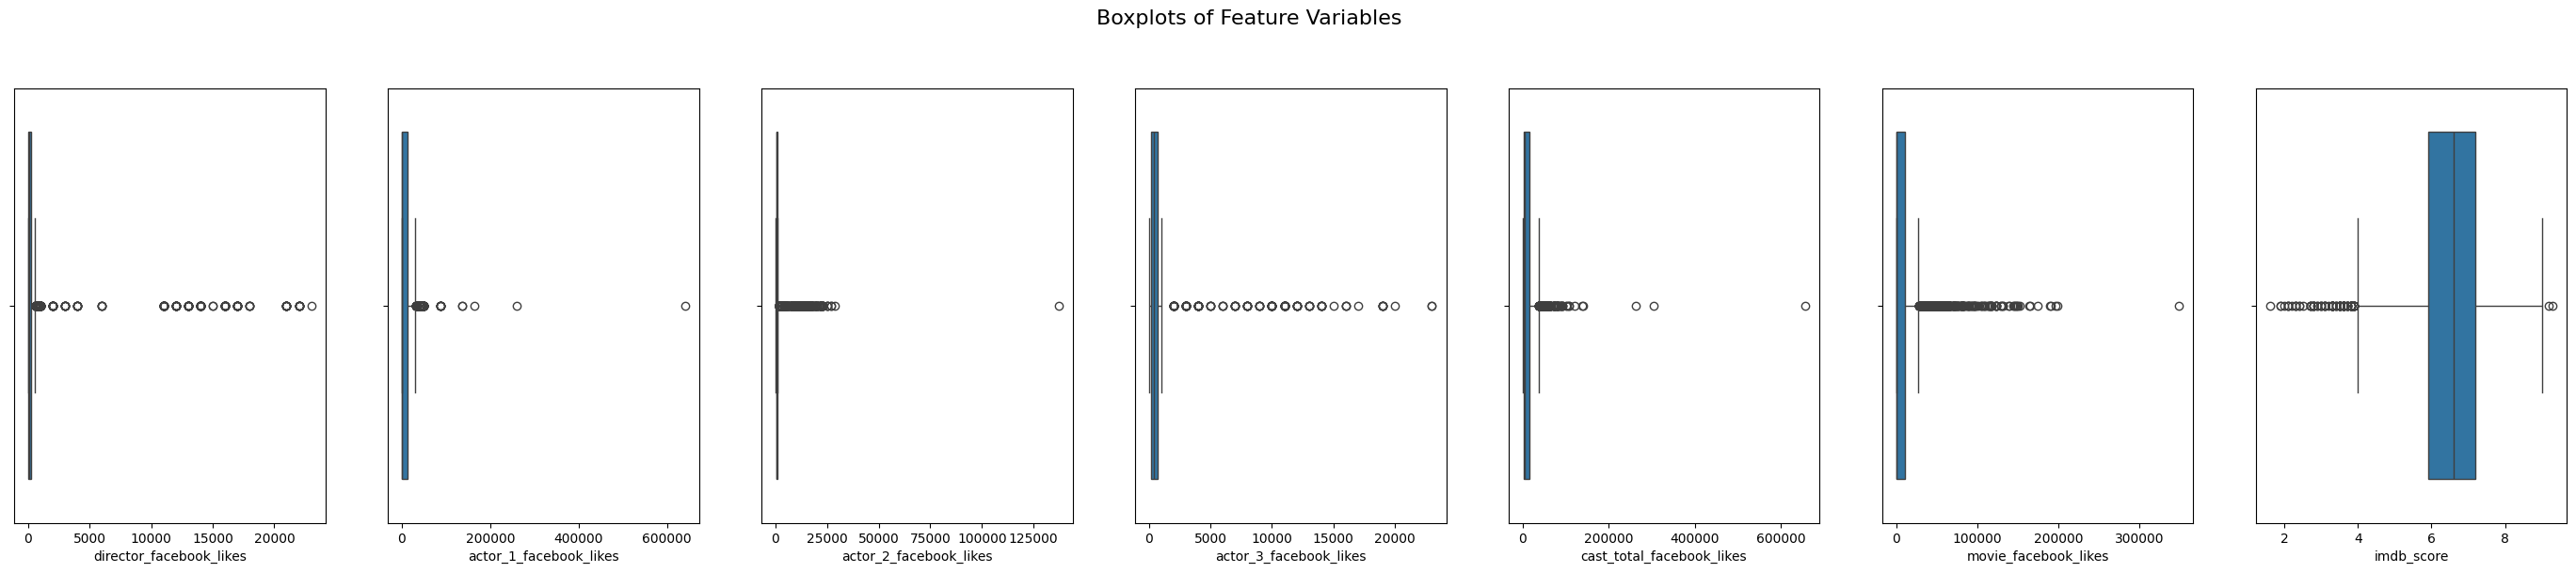

In [265]:
fn.plot_boxplots(df_vraag1, featureVariables)

**imdb_score**

Deze featureVariabel heeft geen duidelijke outliers. Dit maakt het betrouwbaarder en gemakkelijker te gebruiken in onze modellen.

**Andere Variabelen met likes**

Zoals wij bij histogram hebben gezien, veel van deze featureVariabelen hebben een scheve verdeling, waardoor modellen mogelijk worden beïnvloed.

### Correlatie tussen TargetVariable en FeatureVariables

We gaan hier met scatterplots onderzoeken wat de relatie is tussen het aantal Facebook-likes van de regisseur, de acteurs, de film, de IMDb-score en de hele cast en de totale opbrengst van de film.

**Scatterplots**

Bereken de feature variabelen tegenover de doelvariabele, zodat we kunnen zien welke kenmerken (enigszins) belangrijk zijn voor de doelvariabele

Zoals je kunt aflezen is er geen enkele feature variabele die met zekerheid een positieve correlatie heeft. De hoogste heeft een 0.38 wat maar een matige positieve correlatie weergeeft.

In [266]:
correlation = df_vraag1[featureVariables + targetVariable].corr()['gross'].sort_values(ascending=False)
print(correlation)

gross                       1.00
movie_facebook_likes        0.37
actor_3_facebook_likes      0.30
actor_2_facebook_likes      0.25
cast_total_facebook_likes   0.24
imdb_score                  0.22
actor_1_facebook_likes      0.14
director_facebook_likes     0.14
Name: gross, dtype: float64


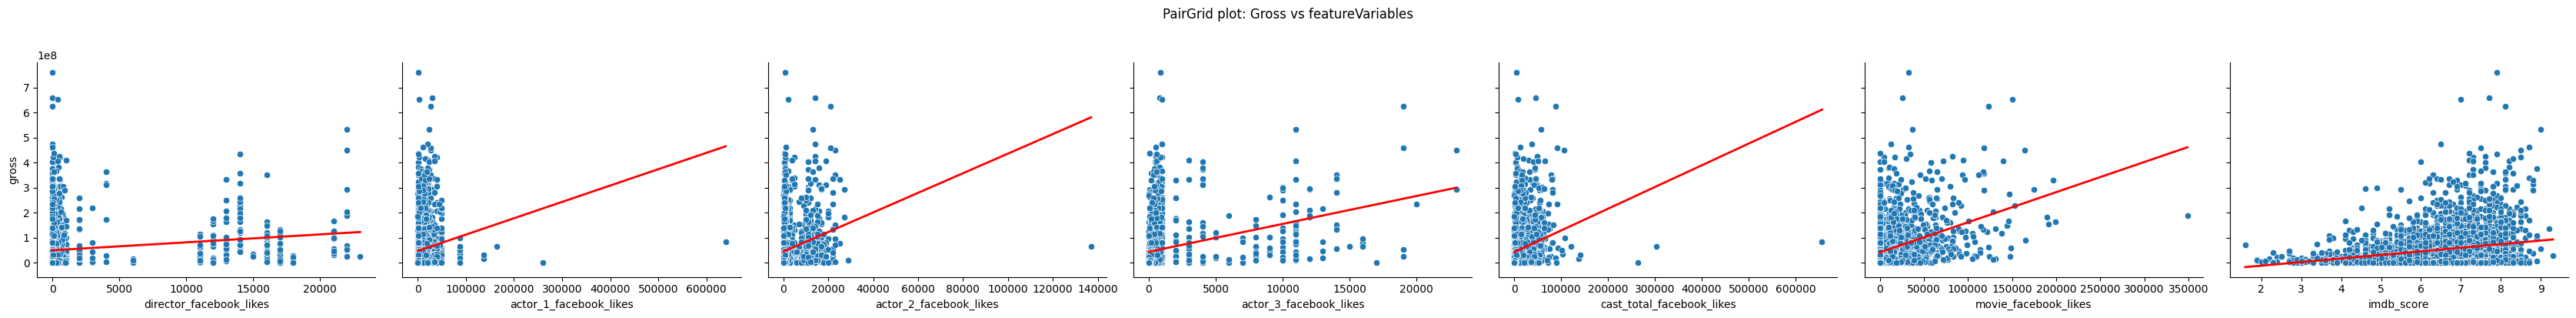

In [267]:
fn.pairgrid_plot(df_vraag1, featureVariables, targetVariable)

**Resultaat**

Deze plot toont de relatie tussen de targetvariabele gross en de verschillende featurevariabelen. De **blauwe punten** zijn de gegevenspunten en de **rode lijn** is een lineaire regressielijn. Hoe schuiner de lijn, hoe hoger de correlatie tussen beide kenmerken.

We zien duidelijk dat een stijgende rode lijn, zoals bij movie_facebook_likes, een positieve relatie heeft. Dit klopt ook, want movie_facebook_likes heeft een positieve correlatie van 0,38.

Bij een vlakke lijn, zoals bij director_facebook_likes, is er een zwakke of bijna geen relatie.

## Onderzoeksvraag 1: In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB


## Modellen ##

Hier gaan we de modellen toepassen op onze data. 

Als eerst gaan we een train test split maken.

In [268]:
X = df_vraag1[featureVariables]
y = df_vraag1[targetVariable]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### Baseline

Een baseline score is nodig om te kijken hoe ver onze modellen hiervan afwijken. Als de score van ons complexere model eronder zit doet het model het beter dan de baseline model wat goed is, als de score erboven zit doet het model het slechter en is dit een reden om dat model niet te gaan gebruiken.

De baseline bereken je met de 'mean_squared_error' uitgedrukt in RMSE. 

De baseline score geeft ons een referentie voor onze modelprestaties. Elk model dat op zijn minst beter presteert dan deze baseline is een verbetering.

In [269]:
# Dit gemiddelde word als de "baseline" voorspelling gebruikt voor alle tests.
baseline = np.mean(y_train)

# Dit betekent dat elke voorspelling hetzelfde is en gelijk is aan het gemiddelde van y_train.
y_pred = np.ones(len(X_test)) * baseline

# 'squared=False' geeft aan dat de wortel van de mean squared errror word genomen, zodat je de RMSE krijgt.
baseline_score = root_mean_squared_error(y_test, y_pred)

print(f"RMSE: {baseline_score:.2f}")

RMSE: 79376566.49


### Linieare Regressie

Als eerst gaan we linieare regressie toepassen. 

De data gaan we ook normaliseren. Normaliseren is nodig om het linieare regressie model beter te laten werken omdat het model werkt op relatieve afstanden van elkaar.

Bij dit model hebben we niet gekozen voor hyperparameters, dit model is vrij simpel en geeft alleen een directe oplossing door de normale vergelijking.

In [270]:
scaler = StandardScaler()

# Een genormaliseerde train en test maken
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [271]:
# Maak een lineaire regressie model aan
lr = lm.LinearRegression()

# Fit het model met de trainings data
lr.fit(X_train_scaled, y_train)

# Bereken de voorspellingen voor de test data
y_pred = lr.predict(X_test_scaled)

# Bereken de RMSE
lr_score = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {lr_score:.2f}")

# Bereken de R^2 score voor het regressiemodel
lr_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {lr_r2:.2f}")

Root Mean Squared Error: 68245991.49
R-squared: 0.25


De uitkomst van dit model is 58977858.91 en zit met 14,94% onder het baseline model wat goed is.

De R-squared is 0.29. Dit model kan ongeveer 29% van de variatie in de variabele kan verklaren. 

Dit is niet al te best. Dit duid op een niet linieare relatie. (dit hadden we ook gezien bij de correlatie plots)

### KNN

Hier gaan we KNN toepassen. De hyperparameters zijn n_neighbors=15, weights="distance", p=2.

We hebben gekozen voor N_neighbors=15 want uit code blijkt beste aantal buren is gelijk aan 15.

Ook hebben we gekozen voor p=2. Dit neemt de euclidische afstand, ipv p=1 de minkowski afstand. Dit geeft voor onze dataset het beste resultaat.

C:\Users\pim-d\AppData\Local\Temp\ipykernel_20804\3018341302.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


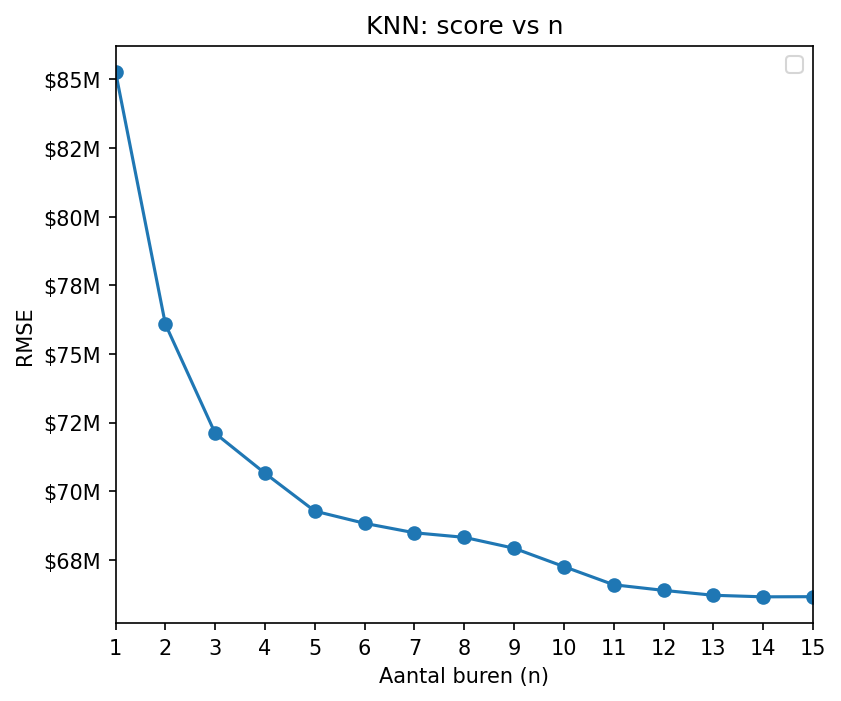

In [272]:
# Code uit de les van CM09
data = []

max_n = 15

for i in range(1, max_n + 1):
    knn = KNeighborsRegressor(n_neighbors=i, weights="distance", p=2)

    # Fitten met trainingsdaata
    knn.fit(X_train_scaled, y_train)

    # Bereken de voorspellingen
    y_pred = knn.predict(X_test_scaled)

    # Bereken de RMSE
    knn_score = root_mean_squared_error(y_test, y_pred)

    data.append([i, knn_score])


df_knn = pd.DataFrame(data, columns=['n', 'RMSE'])

fig = plt.figure(figsize=(6,5), dpi=150)
ax = plt.axes()

ax.set(xlim=(1,max_n),
       xlabel='Aantal buren (n)',
       ylabel='RMSE',
       title='KNN: score vs n')

ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.ticklabel_format(useOffset=False)
ax.plot(df_knn['n'], df_knn['RMSE'], '-o')

ax.yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))

ax.legend()
plt.show()

In [273]:
# beste aantal buren berekenen
best_n = None
best_rmse = float('inf')

for index, row in df_knn.iterrows():
    if row['RMSE'] < best_rmse:
        best_n = row['n']
        best_rmse = row['RMSE']

print(f"Beste n: {int(best_n)} met RMSE = {best_rmse:.2f}")

Beste n: 14 met RMSE = 66152541.95


In [274]:
# KNN regressie model met hyperparameters
knn = KNeighborsRegressor(n_neighbors=int(best_n), weights="distance", p=2)

# Fitten met trainingsdaata
knn.fit(X_train_scaled, y_train)

# Bereken de voorspellingen
y_pred = knn.predict(X_test_scaled)

# Bereken de RMSE
knn_score = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {knn_score:.2f}")

# Bereken de R^2 score voor het KNN model
knn_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {knn_r2:.2f}")

Root Mean Squared Error: 66152541.95
R-squared: 0.30


De uitkomst van dit model is 58.339.596,58, wat 16,37% onder het baseline model ligt, wat goed is. 

De R-squared waarde is 0,30, wat aangeeft dat dit model ongeveer 30% van de variatie in de afhankelijke variabele kan verklaren, wat nog steeds niet goed genoeg is. 

Dit wijst op een niet-lineaire relatie tussen de variabelen (dit was ook te zien in de correlatieplots).

### Decision Tree Regressor

We passen nu een decision tree regressor toe. Deze keuze hebben we gemaakt omdat deze beter om zou moeten kunnen gaan met niet lineare verbanden. 

Wat goed uitkomt want uit ons correlatie onderzoek is een slechte correlatie gekomen. 

We hoeven ook geen gebruik te maken van een scalar om te normaliseren. Een DTR kan hiermee omgaan.

We gebruiken max_depth=3 omdat dit het 'beste' model is wat we hebben. Zelfs door veel verder te gaan in de boom wordt de score alleen maar slechter.

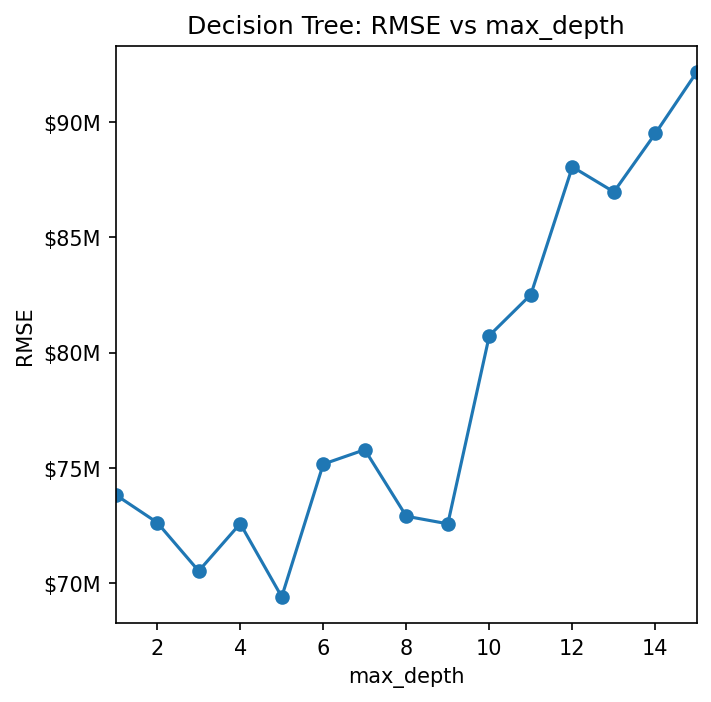

In [275]:
data = []

max_depth = 15

for i in range(1, max_depth + 1):
    # DTR met alle max_depths
    tree = DecisionTreeRegressor(max_depth=i, random_state=42)
    
    # Fitten met niet gescalede data
    tree.fit(X_train, y_train)
    
    # Bereken de voorspellingen
    y_pred = tree.predict(X_test)
    
    # Bereken de RMSE
    tree_score = root_mean_squared_error(y_test, y_pred)
    
    data.append([i, tree_score])

df_tree = pd.DataFrame(data, columns=['max_depth', 'RMSE'])

# Plotten van de resultaten
fig = plt.figure(figsize=(5, 5), dpi=150)
ax = plt.axes()

# Instellen van de plotlimieten en labels
ax.set(xlim=(1, max_depth),
       xlabel='max_depth',
       ylabel='RMSE',
       title='Decision Tree: RMSE vs max_depth')

ax.plot(df_tree['max_depth'], df_tree['RMSE'], '-o')

ax.yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))

plt.show()

In [276]:
# Decision Tree Regressor initialiseren en trainen
tree_regressor = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_regressor.fit(X_train, y_train)

# Voorspellingen doen op de test set
y_pred = tree_regressor.predict(X_test)

# Evaluatie van het model
mse = root_mean_squared_error(y_test, y_pred)
tree_score = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {tree_score:.2f}")

# Bereken de R^2 score voor het Decision Tree model
tree_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {tree_r2:.2f}")

Root Mean Squared Error (RMSE): 8398.43
R-squared: 0.20


De uitkomst van dit model is 62424735.88, wat met 10,52% boven het baseline model zit wat goed is. 

Een R-squared van 0.18 wat aangeeft dat dit model ongeveer 19% van de variatie in de variabele kan verklaren wat slecht is. 

Dit is niet al te best. Dit duid op een niet linieare relatie. (dit hadden we ook gezien bij de correlatie plots)

## Conclusie onderzoeksvraag 1

In [277]:
#  samenvatting van alle resultaten uit modellen
results = []

results.append(['Linear Regression', lr_score, lr_r2])
results.append(['KNN Regression', knn_score, knn_r2])
results.append(['Decision Tree Regression', tree_score, tree_r2])

df_results = pd.DataFrame(results, columns=['Model', 'RMSE', 'R²'])
print(df_results)

                      Model          RMSE   R²
0         Linear Regression 68,245,991.49 0.25
1            KNN Regression 66,152,541.95 0.30
2  Decision Tree Regression      8,398.43 0.20


**Het KNN model** doet het iets beter dan lineaire regressie, maar het verschil is klein. Het KNN model werkt ook beter dan het baseline model en het beslissingsboommodel (DTR). 

Het KNN model heeft R² = 0.30, wat ook niet goed is en betekent dat het model maar 30% van de verschillen in omzet kan verklaren.

**Hiermee concluderen we dat de omzet van een film niet te voorspellen is op basis van de populariteit op facebook en IMDB.**

# Onderzoeksvraag 2: Is het mogelijk om te voorspellen of een film een oscar zal winnen of niet?

Een oscar winnen is een hele eer in de filmindustrie. Het is dus zeer interessant of we wellicht een model kunnen bouwen welke film een oscar zou winnen of niet, een simpele ja of nee. We hebben dus te maken met een *binaire classificatieprobleem*.

We kiezen hier later 3 modellen voor: Logistic Regression, Decision Tree en KNN. Laten we voor nu de data induiken en zien wat we hebben.

In [278]:
# Inladen db

oscar_db = pd.read_csv('data/the_oscar_award.csv')

In [279]:
# Check of alles correct is ingeladen

oscar_db.head(5)

year_film  year_ceremony  ceremony category                 name  \
0       1927           1928         1    ACTOR  Richard Barthelmess   
1       1927           1928         1    ACTOR        Emil Jannings   
2       1927           1928         1  ACTRESS       Louise Dresser   
3       1927           1928         1  ACTRESS         Janet Gaynor   
4       1927           1928         1  ACTRESS       Gloria Swanson   

               film  winner  
0         The Noose   False  
1  The Last Command    True  
2   A Ship Comes In   False  
3        7th Heaven    True  
4    Sadie Thompson   False

We zien hier 7 tabellen terug de Target waarop wij gaan focussen is de 'Winner' tabel. Daarin kunnen we zien of een film een oscar heeft gewonnen of niet.

In [280]:
oscar_db.describe()

year_film  year_ceremony  ceremony
count  10,889.00      10,889.00 10,889.00
mean    1,976.61       1,977.61     49.63
std        27.36          27.36     27.32
min     1,927.00       1,928.00      1.00
25%     1,952.00       1,953.00     25.00
50%     1,976.00       1,977.00     49.00
75%     2,001.00       2,002.00     74.00
max     2,023.00       2,024.00     96.00

Hieruit volgt dat tabel 'ceremony' gewoonweg bijhoudt hoeveel keer de oscar awards zijn gehouden. en de year_film en year_ceremony gewoonweg in welk jaar het evenement zich plaatsvond.

In [281]:
oscar_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10889 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 521.2+ KB


### Target analyse

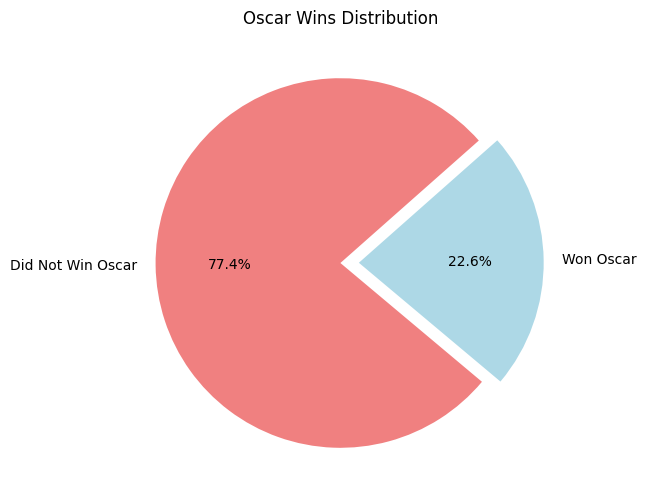

In [282]:
# Check hoeveel True en False er zijn in de Winner tabel (oftewel hoeveel films een oscar hebben gewonnen of niet)
true_count = oscar_db['winner'].value_counts()[True]
false_count = oscar_db['winner'].value_counts()[False]

# Benaming voor de taart diagram
labels = ['Won Oscar', 'Did Not Win Oscar']

# Data om te plotten
sizes = [true_count, false_count]

# Maak taart diagram
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=320, explode = [0.1,0],colors=['lightblue', 'lightcoral'])
plt.title('Oscar Wins Distribution')
plt.show()

We zien dus dat minder dan een vierde van de genomineerde een Oscar wint. Laten we de twee datasets mergen, zo kunnen we niet alleen beter zien welke films werden genomineerd, maar ook welke *niet* zijn genomineerd. Voordat we mergen laten we deze dataset eerst opschonen.

### Missende waardes analyseren

In [283]:
oscar_db.isna().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               5
film             319
winner             0
dtype: int64

Laten we kijken waarom er 319 films een Nan waarde geven. 

In [284]:
missing_films = oscar_db[oscar_db['film'].isna()]

In [285]:
missing_films['winner'].value_counts() # Check hoeveel van die missende waardes een oscar hebben gewonnen

winner
True     293
False     26
Name: count, dtype: int64

In [286]:
missing_films[['name','category','winner']]

name  \
16                                        Ralph Hammeras   
18                                      Nugent Slaughter   
31                                        Joseph Farnham   
32                                    George Marion, Jr.   
33                                          Warner Bros.   
34                                       Charles Chaplin   
145    Samuel Goldwyn - United Artists Studio Sound D...   
146          Metro-Goldwyn-Mayer Studio Sound Department   
147             Paramount Publix Studio Sound Department   
148                    RKO Radio Studio Sound Department   
192          Metro-Goldwyn-Mayer Studio Sound Department   
193             Paramount Publix Studio Sound Department   
194                    RKO Radio Studio Sound Department   
195    Warner Bros.-First National Studio Sound Depar...   
203      Walt Disney for the creation of "Mickey Mouse."   
213                                    Percy Ikerd (Fox)   
214                                 William Tummel (Fox)   
215                 Charles Dorian (Metro-Goldwyn-Mayer)   
216                     Bunny Dull (Metro-Goldwyn-Mayer)   
217                 John S. Waters (Metro-Goldwyn-Mayer)   
218                           Charles Barton (Paramount)   
219                           Sidney S. Brod (Paramount)   
220                          Arthur Jacobson (Paramount)   
221                             Eddie Killey (RKO Radio)   
222                            Dewey Starkey (RKO Radio)   
223                            Fred Fox (United Artists)   
224                     Benjamin Silvey (United Artists)   
225                               Scott Beal (Universal)   
226                            Joe McDonough (Universal)   
227                             W. J. Reiter (Universal)   
228                             Al Alborn (Warner Bros.)   
229                   Gordon Hollingshead (Warner Bros.)   
230                         Frank X. Shaw (Warner Bros.)   
329                                       Shirley Temple   
414                                  David Wark Griffith   
520     The March of Time for its significance to mot...   
521     W. Howard Greene and Harold Rosson for the co...   
640                                         Mack Sennett   
641     Edgar Bergen for his outstanding comedy creation   
642     The Museum of Modern Art Film Library for its...   
643     W. Howard Greene for the color photography of...   
644                                     Darryl F. Zanuck   
771     Deanna Durbin and Mickey Rooney for their sig...   
772     Harry M. Warner in recognition of patriotic s...   
773      Walt Disney for Snow White and the Seven Dwarfs   
774     Oliver Marsh and Allen Davey for the color ci...   
775    For outstanding achievement in creating Specia...   
776     J. Arthur Ball for his outstanding contributi...   
777                                       Samuel Goldwyn   
778                                        Joe Pasternak   
779                                    David O. Selznick   
780                                       Hunt Stromberg   
781                                        Hal B. Wallis   
782                                        Walter Wanger   
783                                     Darryl F. Zanuck   
921     Douglas Fairbanks (Commemorative Award) - rec...   
922     The Motion Picture Relief Fund - acknowledgin...   
923     Judy Garland for her outstanding performance ...   
924     William Cameron Menzies for outstanding achie...   
925     the Technicolor Company for its contributions...   
926                                    David O. Selznick   
1085                                            Bob Hope   
1086    Colonel Nathan Levinson for his outstanding s...   
1265    Rey Scott for his extraordinary achievement i...   
1266    The British Ministry of Information for its v...   
1267    Leopold Stokowski and his associates for thei...   
1268                            

Het ziet ernaar uit dat het geen foute waardes zijn. Deze oscars waren gelinkt aan prestaties van een bedrijf of een individu, en was dus niet per se gelinkt aan een individuele film. Maar aangezien ze niet gelinkt zijn aan een film titel gaan we deze missende waardes dus verwijderen. Aangezien ze niet helpen met de onderzoeksvraag. Laten we alleen nog even kijken naar de 5 missende 'names'.

In [287]:
oscar_db[oscar_db['name'].isna()]

year_film  year_ceremony  ceremony                          category  \
10513       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   
10514       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   
10635       2021           2022        94  JEAN HERSHOLT HUMANITARIAN AWARD   
10759       2022           2023        95  JEAN HERSHOLT HUMANITARIAN AWARD   
10885       2023           2024        96  JEAN HERSHOLT HUMANITARIAN AWARD   

      name film  winner  
10513  NaN  NaN    True  
10514  NaN  NaN    True  
10635  NaN  NaN    True  
10759  NaN  NaN    True  
10885  NaN  NaN    True

In [288]:
oscar_db[oscar_db['category'] == 'JEAN HERSHOLT HUMANITARIAN AWARD']

year_film  year_ceremony  ceremony                          category  \
3259        1956           1957        29  JEAN HERSHOLT HUMANITARIAN AWARD   
3357        1957           1958        30  JEAN HERSHOLT HUMANITARIAN AWARD   
3589        1959           1960        32  JEAN HERSHOLT HUMANITARIAN AWARD   
3710        1960           1961        33  JEAN HERSHOLT HUMANITARIAN AWARD   
3833        1961           1962        34  JEAN HERSHOLT HUMANITARIAN AWARD   
3955        1962           1963        35  JEAN HERSHOLT HUMANITARIAN AWARD   
4324        1965           1966        38  JEAN HERSHOLT HUMANITARIAN AWARD   
4447        1966           1967        39  JEAN HERSHOLT HUMANITARIAN AWARD   
4557        1967           1968        40  JEAN HERSHOLT HUMANITARIAN AWARD   
4665        1968           1969        41  JEAN HERSHOLT HUMANITARIAN AWARD   
4771        1969           1970        42  JEAN HERSHOLT HUMANITARIAN AWARD   
4876        1970           1971        43  JEAN HERSHOLT HUMANITARIAN AWARD   
5085        1972           1973        45  JEAN HERSHOLT HUMANITARIAN AWARD   
5187        1973           1974        46  JEAN HERSHOLT HUMANITARIAN AWARD   
5295        1974           1975        47  JEAN HERSHOLT HUMANITARIAN AWARD   
5402        1975           1976        48  JEAN HERSHOLT HUMANITARIAN AWARD   
5615        1977           1978        50  JEAN HERSHOLT HUMANITARIAN AWARD   
5719        1978           1979        51  JEAN HERSHOLT HUMANITARIAN AWARD   
5831        1979           1980        52  JEAN HERSHOLT HUMANITARIAN AWARD   
6034        1981           1982        54  JEAN HERSHOLT HUMANITARIAN AWARD   
6146        1982           1983        55  JEAN HERSHOLT HUMANITARIAN AWARD   
6250        1983           1984        56  JEAN HERSHOLT HUMANITARIAN AWARD   
6358        1984           1985        57  JEAN HERSHOLT HUMANITARIAN AWARD   
6466        1985           1986        58  JEAN HERSHOLT HUMANITARIAN AWARD   
6887        1989           1990        62  JEAN HERSHOLT HUMANITARIAN AWARD   
7213        1992           1993        65  JEAN HERSHOLT HUMANITARIAN AWARD   
7214        1992           1993        65  JEAN HERSHOLT HUMANITARIAN AWARD   
7323        1993           1994        66  JEAN HERSHOLT HUMANITARIAN AWARD   
7434        1994           1995        67  JEAN HERSHOLT HUMANITARIAN AWARD   
8225        2001           2002        74  JEAN HERSHOLT HUMANITARIAN AWARD   
8564        2004           2005        77  JEAN HERSHOLT HUMANITARIAN AWARD   
8789        2006           2007        79  JEAN HERSHOLT HUMANITARIAN AWARD   
9016        2008           2009        81  JEAN HERSHOLT HUMANITARIAN AWARD   
9385        2011           2012        84  JEAN HERSHOLT HUMANITARIAN AWARD   
9510        2012           2013        85  JEAN HERSHOLT HUMANITARIAN AWARD   
9636        2013           2014        86  JEAN HERSHOLT HUMANITARIAN AWARD   
9761        2014           2015        87  JEAN HERSHOLT HUMANITARIAN AWARD   
9886        2015           2016        88  JEAN HERSHOLT HUMANITARIAN AWARD   
10391       2019           2020        92  JEAN HERSHOLT HUMANITARIAN AWARD   
10513       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   
10514       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   
10635       2021           2022        94  JEAN HERSHOLT HUMANITARIAN AWARD   
10759       2022           2023        95  JEAN HERSHOLT HUMANITARIAN AWARD   
10885       2023           2024        96  JEAN HERSHOLT HUMANITARIAN AWARD   

                         name film  winner  
3259         Y. Frank Freeman  NaN    True  
3357           Samuel Goldwyn  NaN    True  
3589                 Bob Hope  NaN    True  
3710               Sol Lesser  NaN    True  
3833            George Seaton  NaN    True  
3955             Steve Broidy  NaN    True  
4324        Edmond L. DePatie  NaN    True  
4447           George Bagnall  NaN    True  
4557             Gregory Peck  NaN    True  
4

Het blijkt dat de 'JEAN HERSHOLT HUMANITARIAN AWARD' 5 waardes heeft waarvan er geen naam in is gevuld, dus we weten niet wie deze award heeft gewonnen. En aangezien er maar 5 missende 'names' zijn in de hele dataset is het dus veilig om deze fouten eruit te halen. 

### Conclusie missende waardes
Beide tabellen worden verwijderd uit de dataset. Beide tabellen zeggen niks over het feit dat een film een oscar won of niet. 

In [289]:
clean_oscar_db = oscar_db.copy()

In [290]:
clean_oscar_db.dropna(subset='film', inplace=True)

clean_oscar_db.isna().sum()

### Outliers analyseren

Nu dat we geen foutieve lege waardes hebben, laten we kijken of er bepaalde uitschieters zijn in onze data. Aangezien we met nominale waardes werken is het beter om puur te kijken welke waardes 'zeldzaam' zijn. Oftewel zeer weinig voorkomen. 

In [291]:
cat_counts = clean_oscar_db['category'].value_counts(ascending=False)

In [292]:
cat_counts

category
DIRECTING                                                                                                                                    469
FILM EDITING                                                                                                                                 450
ACTRESS IN A SUPPORTING ROLE                                                                                                                 440
ACTOR IN A SUPPORTING ROLE                                                                                                                   440
DOCUMENTARY (Short Subject)                                                                                                                  378
BEST PICTURE                                                                                                                                 371
DOCUMENTARY (Feature)                                                                                                    

In [293]:
cat_counts.describe()

count   107.00
mean     98.79
std     119.74
min       1.00
25%      10.00
50%      50.00
75%     143.00
max     469.00
Name: count, dtype: float64

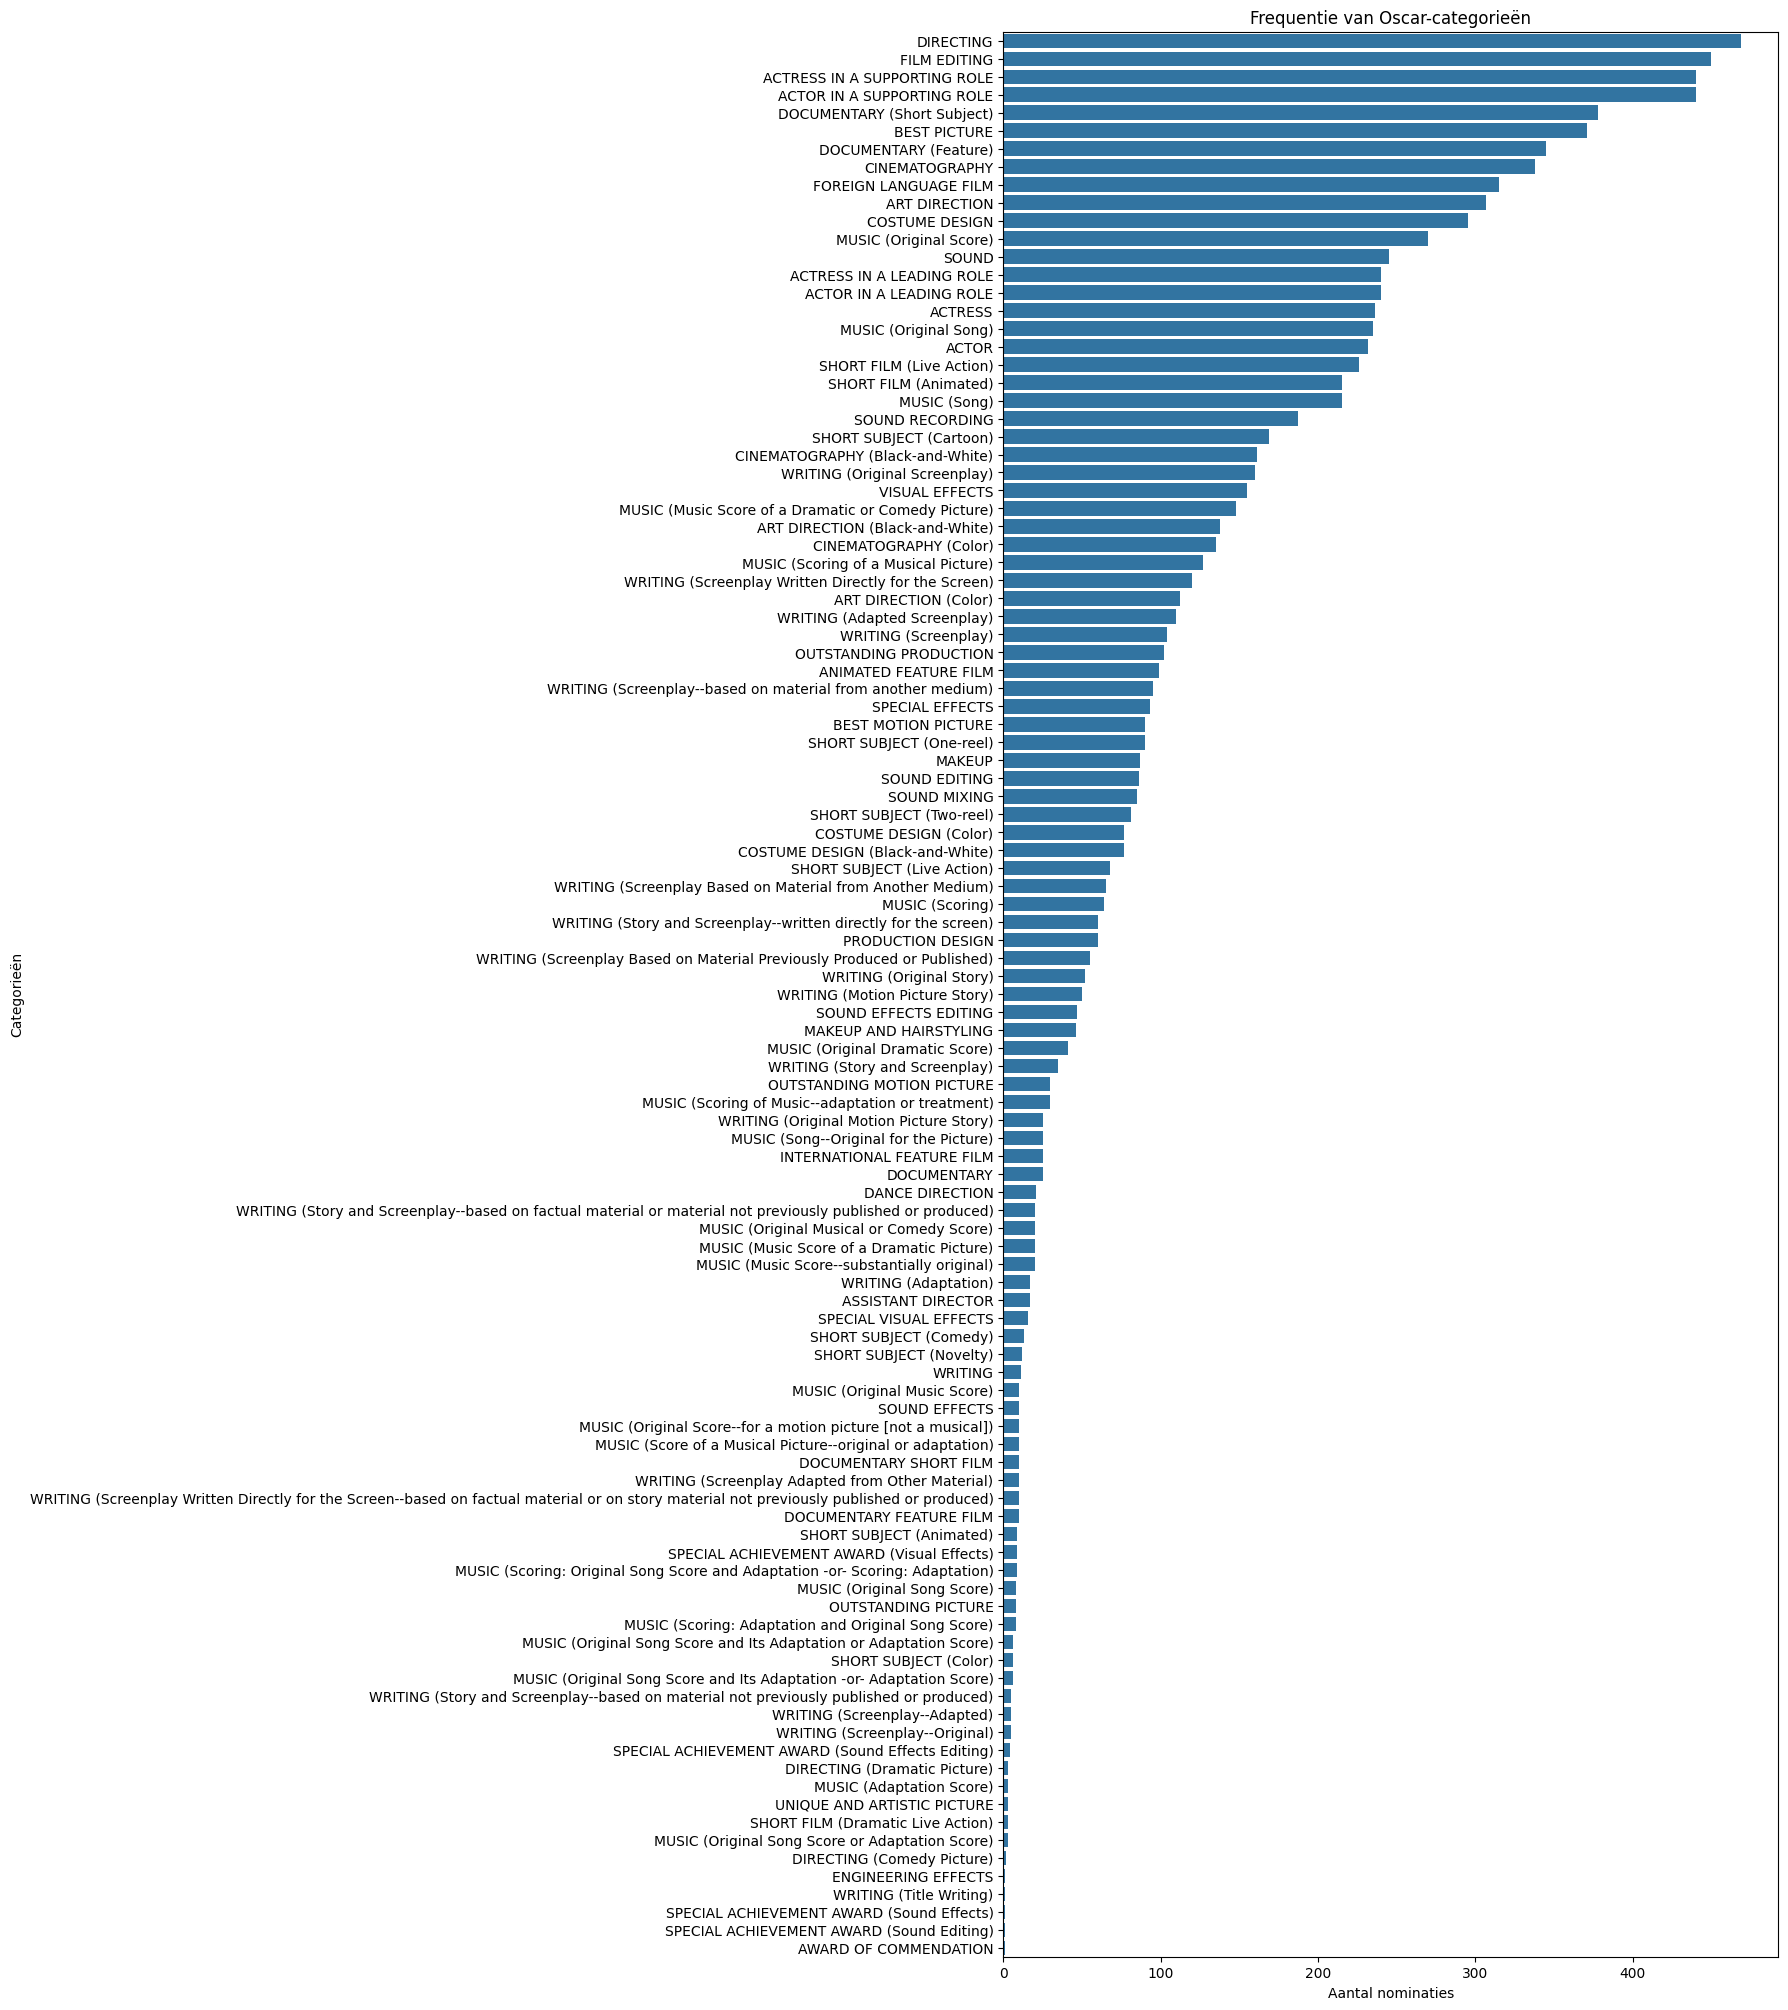

In [294]:
# Maak een horizontale barplot
plt.figure(figsize=(10, 25))
sns.barplot(x=cat_counts.values, y=cat_counts.index)
plt.xlabel('Aantal nominaties')
plt.ylabel('Categorieën')
plt.title('Frequentie van Oscar-categorieën')
plt.show()

### Categorieën samenvoegen
We zien een rechtscheve verdeling van de data. Het gemiddelde ligt veel hoger dan de mediaan en de standaarddeviatie is ook zeer hoog. 

Het lijkt mij een goed idee om categorieën bij elkaar te groeperen die heel erg op elkaar lijken om zo minder unieke waardes te hebben, wat makkelijker voor ons model is om over te voorspellen. 

Ook gaan we overige waardes plaatsen in een nieuwe categorie genaamd 'Other'.

In [295]:
# Samenvoegen van vergelijkbare categorieën
clean_oscar_db['category'] = clean_oscar_db['category'].replace({
    r'^MUSIC.*': 'MUSIC',
    r'^WRITING.*': 'WRITING',
    r'^SHORT SUBJECT.*': 'SHORT FILM',
    r'^DOCUMENTARY.*': 'DOCUMENTARY',
    r'^CINEMATOGRAPHY.*': 'CINEMATOGRAPHY',
    r'^ART DIRECTION.*': 'PRODUCTION DESIGN',
    r'^DIRECTING.*': 'DIRECTING',
    r'^SOUND.*': 'SOUND'
}, regex=True)

In [296]:
new_cat_counts = clean_oscar_db['category'].value_counts(ascending=False)

threshold = 50  # minder dan 50 nominaties worden in Other geplaatst
clean_oscar_db['category'] = clean_oscar_db['category'].apply(
lambda x: 'OTHER' if new_cat_counts[x] < threshold else x
)

new_cat_counts = clean_oscar_db['category'].value_counts(ascending=False)

In [297]:
new_cat_counts.describe()

count      29.00
mean      364.48
std       294.03
min        77.00
25%       155.00
50%       240.00
75%       450.00
max     1,288.00
Name: count, dtype: float64

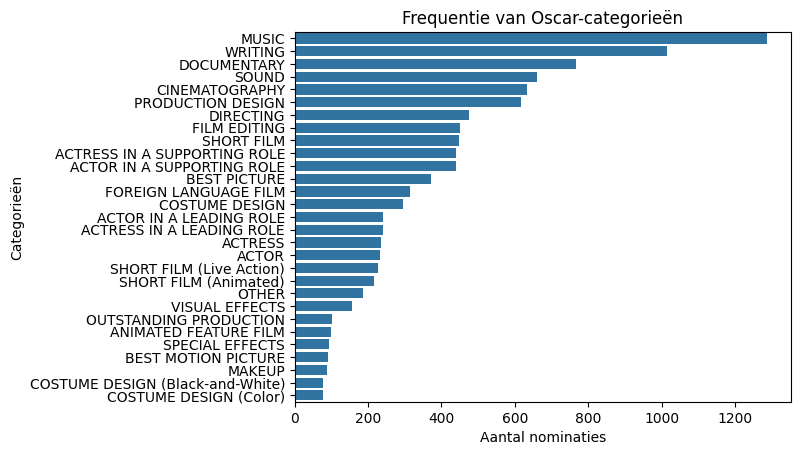

In [298]:
# Maak een horizontale barplot
sns.barplot(x=new_cat_counts.values, y=new_cat_counts.index)
plt.xlabel('Aantal nominaties')
plt.ylabel('Categorieën')
plt.title('Frequentie van Oscar-categorieën')
plt.show()

In [299]:
winner_category = clean_oscar_db.groupby('category')['winner'].value_counts().unstack()

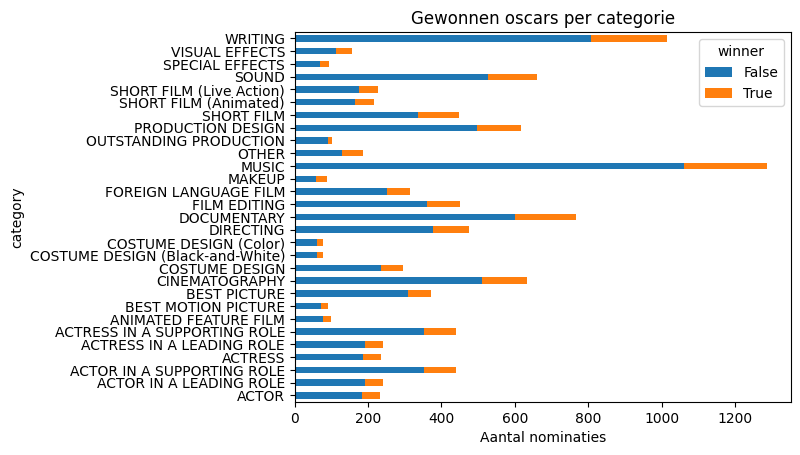

In [300]:
winner_category.plot(kind='barh',
                     title='Gewonnen oscars per categorie',
                     stacked=True,
                    xlabel='Aantal nominaties')
plt.show()

Sommige categorieën komen vaker voor, maar het aantal gewonnen oscars is relatief hetzelfde voor elke catogorie.
We nemen deze kolom dus niet mee in ons voorspelling model om ruis te voorkomen.

### Databases mergen

We gaan de databases mergen op de 'movie_titel' tabel en de 'name' tabel. We joinen met 'left'.

In [301]:
# Zet de datatypes om naar strings

df_2 = dfr.copy()

df_2['movie_title'] = df_2['movie_title'].astype(str)
clean_oscar_db['film'] = clean_oscar_db['film'].astype(str) 

# Normaliseer de data
df_2['movie_title'] = df_2['movie_title'].str.strip().str.lower()
clean_oscar_db['film'] = clean_oscar_db['film'].str.strip().str.lower()

In [302]:
clean_oscar_db['film'].sample(5)

7475          leaving las vegas
7265        in the line of fire
8210             monsters, inc.
3120      rebel without a cause
2673    hans christian andersen
Name: film, dtype: object

In [303]:
df_2['movie_title'].sample(5)

3679                                     wonderland
1728                           the color of freedom
2625                                   little women
3230              police academy: mission to moscow
2751    dungeons & dragons: wrath of the dragon god
Name: movie_title, dtype: object

In [304]:
merged_df = pd.merge(df_2, clean_oscar_db, left_on='movie_title', right_on='film', how='left')

In [305]:
merged_df.sample(5)

color     director_name  num_critic_for_reviews  duration  \
605   Color     Steve Martino                  208.00     88.00   
4286  Color     Gregor Jordan                  109.00     98.00   
1256  Color    Brenda Chapman                  120.00     99.00   
1476  Color  Gabriele Muccino                  202.00    123.00   
5513  Color  Robert Stevenson                  145.00    139.00   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
605                     20.00                   36.00    Venus Schultheis   
4286                    34.00                  730.00         Scott Glenn   
1256                    59.00                  145.00  Aria Noelle Curzon   
1476                   125.00                  835.00      Rosario Dawson   
5513                    55.00                  266.00        Glynis Johns   

      actor_1_facebook_likes          gross  \
605                   144.00 130,174,897.00   
4286                  936.00     353,743.00   
1256                  770.00 101,217,900.00   
1476               10,000.00  69,951,824.00   
5513                  382.00 102,300,000.00   

                                                 genres       actor_1_name  \
605                   Adventure|Animation|Comedy|Family  Francesca Capaldi   
4286                    Comedy|Crime|Drama|Thriller|War     Dean Stockwell   
1256  Adventure|Animation|Biography|Drama|Family|Fan...       Martin Short   
1476                                      Drama|Romance         Will Smith   
5513                      Comedy|Family|Fantasy|Musical            Ed Wynn   

              movie_title  num_voted_users  cast_total_facebook_likes  \
605     the peanuts movie            27918                        309   
4286     buffalo soldiers            20730                       3578   
1256  the prince of egypt            91093                       1195   
1476         seven pounds           232710                      14727   
5513         mary poppins           107408                       2045   

         actor_3_name  facenumber_in_poster  \
605     Bill Melendez                  0.00   
4286             Leon                  1.00   
1256      Eden Riegel                  2.00   
1476   Madison Pettis                  1.00   
5513  Elsa Lanchester                  2.00   

                                          plot_keywords  \
605               dog|girl|imagination|peanuts|red hair   
4286      berlin wall|germany|murder|soldier|specialist   
1256  ancient egypt|hebrew|nudity|pharaoh|title dire...   
1476  boyfriend girlfriend relationship|heart|main c...   
5513  banker|female protagonist|live action and anim...   

                                        movie_imdb_link  num_user_for_reviews  \
605   http://www.imdb.com/title/tt2452042/?ref_=fn_t...                155.00   
4286  http://www.imdb.com/title/tt0252299/?ref_=fn_t...                111.00   
1256  http://www.imdb.com/title/tt0120794/?ref_=fn_t...                353.00   
1476  http://www.imdb.com/title/tt0814314/?ref_=fn_t...                599.00   
5513  http://www.imdb.com/title/tt0058331/?ref_=fn_t...                259.00   

     language country content_rating        budget  title_year  \
605   English     USA              G 99,000,000.00    2,015.00   
4286  English      UK              R 15,000,000.00    2,001.00   
1256  English     USA             PG 70,000,000.00    1,998.00   
1476  English     USA          PG-13 55,000,000.00    2,008.00   
5513  English     USA       Approved  6,000,000.00    1,964.00   

      actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  \
605                    42.00        7.20          1.85                 33000   
4286                  826.00        6.90          2.35                   664   
1256                  263.00        7.00          1.85                     0   
1476                3,000.00        7.70          2.35                 26000   
5513                  279.0

We zien veel NaN waardes bij de kolom film/winner/name. We kunnen er dus vanuit gaan dat deze films niet zijn genomineerd. Laten we een nieuwe categorie maken om dit duidelijk te maken. 

In [306]:
# Voeg een nieuwe kolom toe voor de categorieën
merged_df['oscar_categorie'] = merged_df['winner'].apply(
    lambda x: 'Oscar gewonnen' if x == True else ('Oscar genomineerd' if x == False else 'Niet genomineerd')
)

Laten we data nu visualiseren om een mooi beeld te krijgen.

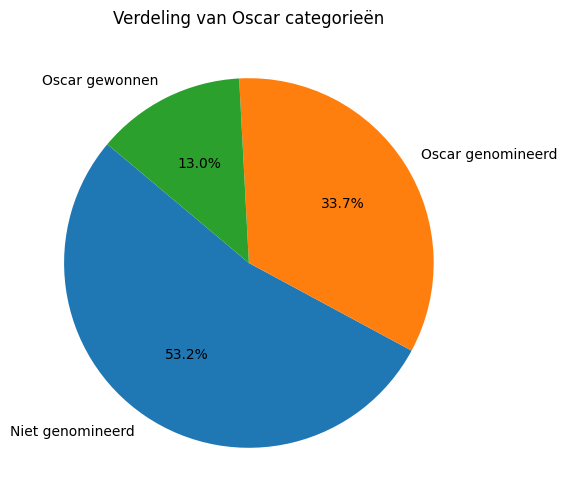

In [307]:
# Data visualiseren
categorie_counts = merged_df['oscar_categorie'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(categorie_counts, labels=categorie_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Verdeling van Oscar categorieën')
plt.show()

We zien hier dat slechts 13% van alle films in onze dataframe een Oscar wint. Laten we nu dieper in de data kijken waarom dit het geval zou kunnen zijn.

In [308]:
# Check welke columns er zijn om mee te werken.
merged_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'year_film',
       'year_ceremony', 'ceremony', 'category', 'name', 'film', 'winner',
       'oscar_categorie'],
      dtype='object')

In [309]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7533 entries, 0 to 7532
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      7514 non-null   object 
 1   director_name              7393 non-null   object 
 2   num_critic_for_reviews     7483 non-null   float64
 3   duration                   7518 non-null   float64
 4   director_facebook_likes    7393 non-null   float64
 5   actor_3_facebook_likes     7509 non-null   float64
 6   actor_2_name               7520 non-null   object 
 7   actor_1_facebook_likes     7526 non-null   float64
 8   gross                      6229 non-null   float64
 9   genres                     7533 non-null   object 
 10  actor_1_name               7526 non-null   object 
 11  movie_title                7533 non-null   object 
 12  num_voted_users            7533 non-null   int64  
 13  cast_total_facebook_likes  7533 non-null   int64

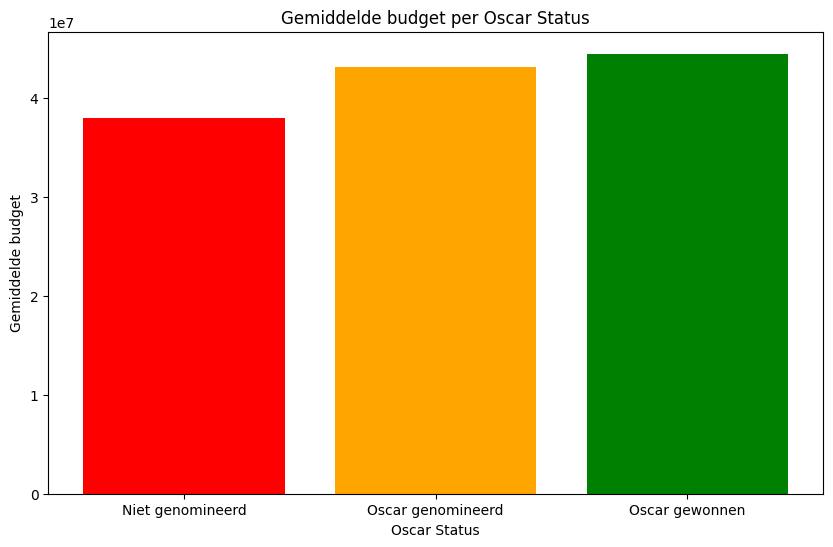

In [310]:
# Analyse van de IMDb-score: Kijk naar de gemiddelde IMDb-score per Oscar-status
oscar_budget = merged_df.groupby('oscar_categorie')['budget'].mean()

# Maak een bar chart voor de gemiddelde IMDb-score per Oscar-status
plt.figure(figsize=(10, 6))
plt.bar(oscar_budget.index, oscar_budget, color=['red', 'orange', 'green'])
plt.title('Gemiddelde budget per Oscar Status')
plt.xlabel('Oscar Status')
plt.ylabel('Gemiddelde budget')
plt.show()

Hieruit volgt dat de films die oscars hebben gewonnen gemiddeld een hoger budget hadden. Dit kan zeker invloed hebben op de kwaliteit van de film en welke acteurs ingehuurd kunnen worden. We kunnen deze kolom later gebruiken in ons voorspelling model. Laten we verder kijken in de data

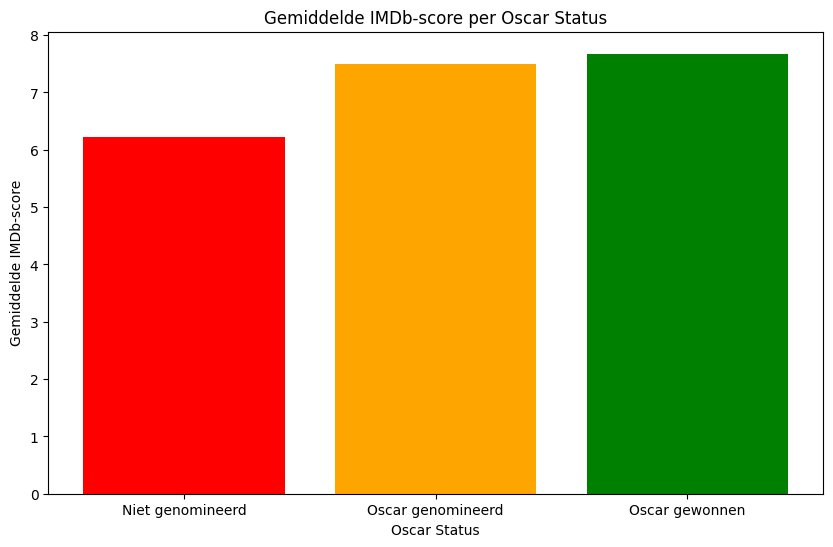

In [311]:
# Analyse van de IMDb-score: Kijk naar de gemiddelde IMDb-score per Oscar-status
imdb_by_status = merged_df.groupby('oscar_categorie')['imdb_score'].mean()

# Maak een bar chart voor de gemiddelde IMDb-score per Oscar-status
plt.figure(figsize=(10, 6))
plt.bar(imdb_by_status.index, imdb_by_status, color=['red', 'orange', 'green'])
plt.title('Gemiddelde IMDb-score per Oscar Status')
plt.xlabel('Oscar Status')
plt.ylabel('Gemiddelde IMDb-score')
plt.show()

We zien hier weer een verband, hoe hoger de IMDb-score des te meer oscars zijn gewonnen. Deze nemen we later dus ook mee in ons model.

In [312]:
merged_df['genres'].value_counts()

genres
Drama                                                               427
Drama|Romance                                                       325
Comedy|Drama|Romance                                                272
Comedy|Drama                                                        236
Comedy                                                              214
Comedy|Romance                                                      171
Crime|Drama|Thriller                                                149
Crime|Drama                                                         129
Biography|Drama|History                                             102
Biography|Drama                                                      93
Action|Crime|Drama|Thriller                                          92
Drama|Thriller                                                       83
Horror                                                               81
Crime|Drama|Mystery|Thriller                             

In [313]:
merged_df['plot_keywords'].value_counts()

plot_keywords
classic literature|denmark|funeral|madness|prince                                                                                                        26
chariot race|epic|false accusation|jerusalem|slave                                                                                                       24
animal name in title|ape abducts a woman|gorilla|island|king kong                                                                                        21
dance|gang|new york city|puerto rican|tragedy                                                                                                            18
artist|love|ship|titanic|wet                                                                                                                             16
crime boss|drug smuggling|heroin|mafia boss|organized crime                                                                                              16
19th century|around the world|inventor|martial art

Het leek leuk om te kijken of we misschien de plot konden gebruiken in onze prediction model, maar de cardinaliteit is veels te hoog van deze kolom. En er zit geen logische structuur in zoals bij genres.

Om overfitten te voorkomen gaan we deze dus niet gebruiken in onze prediction model. Wel gaan we genres meenemen door eerst ze maar in max twee categorieën te plaatsen. 

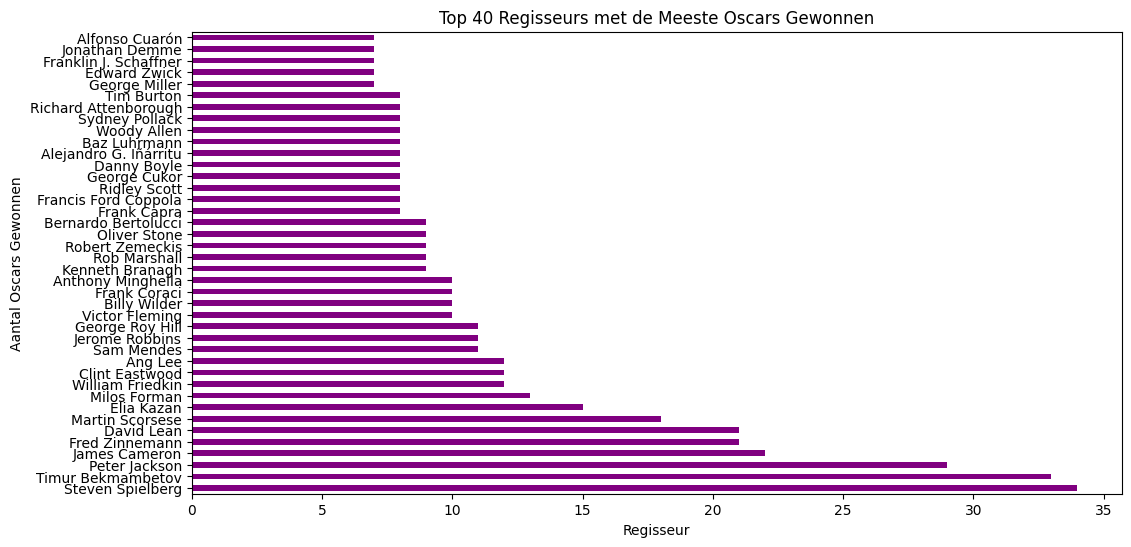

In [314]:
# Analyse van regisseurs: Kijk naar het aantal Oscars gewonnen per regisseur
director_awards= merged_df[merged_df['winner'] == True].groupby('director_name').size().sort_values(ascending=False)
director_40= director_awards.head(40)
# Maak een bar chart voor de top 10 regisseurs met de meeste Oscars gewonnen
plt.figure(figsize=(12, 6))
director_40.plot(kind='barh', color='purple')
plt.title('Top 40 Regisseurs met de Meeste Oscars Gewonnen')
plt.xlabel('Regisseur')
plt.ylabel('Aantal Oscars Gewonnen')
plt.show()

De regrisseur speelt zeker een rol in het behalen van een oscar. Van de gene die winnen hebben vele rond de 10 oscars gewonnen en we hebben er een paar, zoals Steven spielberg die ver boven het gemiddelde zitten. We gaan later het aantal oscars toevoegen per director in een nieuwe kolom.

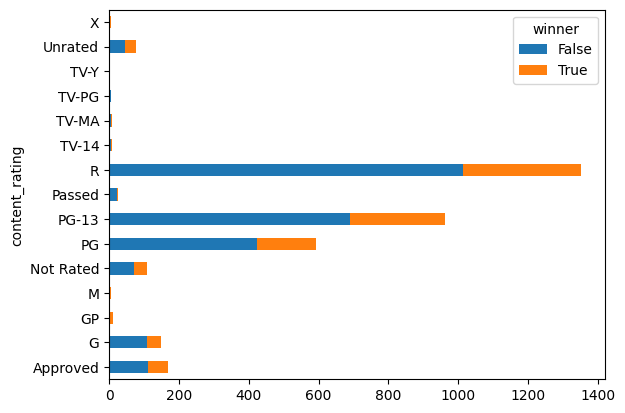

In [315]:
winner_by_content = merged_df.groupby(['content_rating','winner']).size().unstack()
winner_by_content.plot(kind='barh',stacked=True)
plt.show()

Hier zien we hetzelfde als bij de gewonnen oscars per categorie. Geen sterke verbanden, en allemaal relatief gezien even veel kans op een oscar. 

Ook deze tabel word later niet meegenomen.

### Correlatie bekijken
Om goede correlaties te vinden checken we niet meer of een film ook was genomineerd. als het model tussen 3 categorieën moet zoeken word voorspellen lastig. Daarom gaan we bij merged simpelweg zeggen: Heeft het een oscar gewonnen ja of nee.

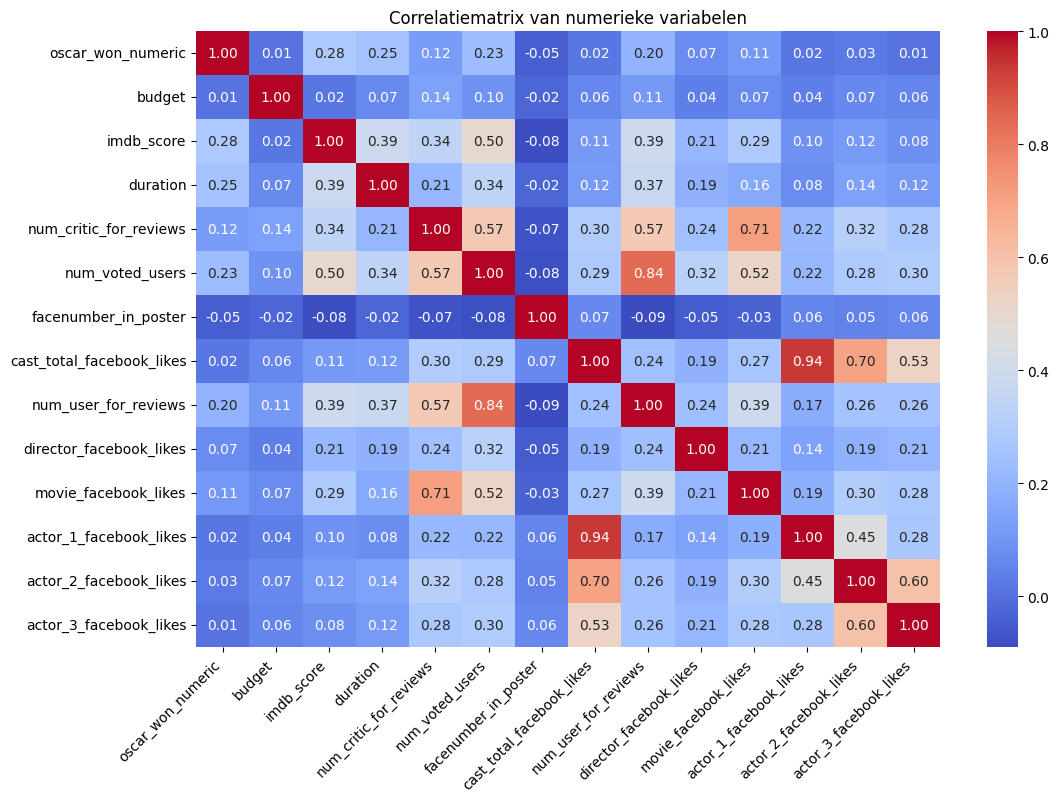

In [316]:
# Verander de catogorie winner naar een numerieke waarde
merged_df['oscar_won_numeric'] = merged_df['winner'].apply(lambda x: 1 if x == True else 0) 

# Selecteer de feature variables
feat_columns = ['oscar_won_numeric', 'budget','imdb_score', 'duration', 'num_critic_for_reviews', 'num_voted_users', 'facenumber_in_poster', 'cast_total_facebook_likes',
                   'num_user_for_reviews', 'director_facebook_likes', 'movie_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']


# Bereken de correlatiematrix
correlation_matrix = merged_df[feat_columns].corr()

# Plot de correlatiematrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot= True , cmap='coolwarm', fmt=".2f")
plt.title('Correlatiematrix van numerieke variabelen')
plt.xticks(rotation=45, ha='right')
plt.show()


Relatief slechte correlaties, voor KNN en Decision Tree maakt dit niet heel veel uit, aangezien ze ook verbanden kunnen vinden bij non lineaire verbindingen. Maar voor onze LogisticRegression is dit wel een probleem. 

Voor nu maken we dus 2 aparte features die we in de modellen stoppen. 
En voor de LR gebruiken we alleen correlaties boven de 0.1. Lagere correlaties dan dat kan wellicht leiden tot overfitten. 

### Data preperation

In [317]:
# Kolom toevoegen die bijhoudt hoeveel oscars een regrisseur heeft gewonnen. 
merged_df['director_oscar_count'] = merged_df['director_name'].map(director_awards).fillna(0)
merged_df['director_oscar_count'].head(40)

0    22.00
1    22.00
2    22.00
3    22.00
4    22.00
5    22.00
6    22.00
7    22.00
8    22.00
9     2.00
10    2.00
11   11.00
12    7.00
13    0.00
14    1.00
15    1.00
16    0.00
17    0.00
18    0.00
19    0.00
20    2.00
21    2.00
22    2.00
23    2.00
24    2.00
25    2.00
26    2.00
27    2.00
28    0.00
29    2.00
30    0.00
31    9.00
32    1.00
33   29.00
34    0.00
35    8.00
36   29.00
37   29.00
38   29.00
39    1.00
Name: director_oscar_count, dtype: float64

Het is lastig om op naam te voorspellen, dus kijken we simpelweg hoeveel oscars een director heeft gewonnen voor ons voorspellingmodel.

In [318]:
# Genres omzetten

# Behoud maximaal 2 categorieen 
merged_df['cleaned_genres'] = merged_df['genres'].replace(
    to_replace=r'^((\w+)(\|\w+)?).*$',  # Match de eerste twee categorieën
    value=r'\1',  # Behoud alleen de eerste twee categorieën
    regex=True  
)
print(merged_df[['genres', 'cleaned_genres']].head(40))


                                               genres       cleaned_genres
0                     Action|Adventure|Fantasy|Sci-Fi     Action|Adventure
1                     Action|Adventure|Fantasy|Sci-Fi     Action|Adventure
2                     Action|Adventure|Fantasy|Sci-Fi     Action|Adventure
3                     Action|Adventure|Fantasy|Sci-Fi     Action|Adventure
4                     Action|Adventure|Fantasy|Sci-Fi     Action|Adventure
5                     Action|Adventure|Fantasy|Sci-Fi     Action|Adventure
6                     Action|Adventure|Fantasy|Sci-Fi     Action|Adventure
7                     Action|Adventure|Fantasy|Sci-Fi     Action|Adventure
8                     Action|Adventure|Fantasy|Sci-Fi     Action|Adventure
9                            Action|Adventure|Fantasy     Action|Adventure
10                           Action|Adventure|Fantasy     Action|Adventure
11                          Action|Adventure|Thriller     Action|Adventure
12                       

In [319]:
# Dummies maken van de genres
genres_encoded = merged_df['cleaned_genres'].str.get_dummies(sep='|')
merged_df = pd.concat([merged_df, genres_encoded], axis=1)

Nu dat elke film maar in max twee categorieën kan zitten maken we er dummies. Deze kunnen we later in onze DT en KNN gebruiken om zo op categorie te kijken of het helpt met het voorspellen.

In [320]:
merged_df.sample(10)

color          director_name  num_critic_for_reviews  \
7274   Black and White          Stacy Peralta                   86.00   
3109             Color         David R. Ellis                  285.00   
3653             Color        Roger Donaldson                   29.00   
5390             Color          Michael Rymer                   28.00   
5439             Color              David Lam                   12.00   
2455             Color           Wes Anderson                  536.00   
6817             Color  Christopher McQuarrie                  387.00   
7200             Color       Amy Holden Jones                    4.00   
6699             Color         Khyentse Norbu                   44.00   
3281             Color           David Palmer                  176.00   

      duration  director_facebook_likes  actor_3_facebook_likes  \
7274     91.00                   147.00                    5.00   
3109    105.00                   160.00                  490.00   
3653    132.00                    79.00                1,000.00   
5390     95.00                    48.00                  826.00   
5439     92.00                     4.00                    4.00   
2455     99.00                     0.00                  670.00   
6817    130.00                   188.00                1,000.00   
7200     88.00                    11.00                  221.00   
6699    108.00                    28.00                    0.00   
3281    100.00                    21.00                  552.00   

         actor_2_name  actor_1_facebook_likes         gross  \
7274        Jay Adams                   22.00  1,293,295.00   
3109   Kenan Thompson                  852.00 34,014,398.00   
3653  Anthony Hopkins               14,000.00  8,600,000.00   
5390        Omar Epps                1,000.00 14,003,141.00   
5439        Louis Koo                   91.00           NaN   
2455    Tom Wilkinson               13,000.00 59,073,773.00   
6817    Robert Duvall               10,000.00 80,033,643.00   
7200   Sally Kirkland                2,000.00           NaN   
6699     Lhakpa Dorji                    0.00    505,295.00   
3281       Tom Arnold               14,000.00 13,746,550.00   

                                      genres      actor_1_name  \
7274                       Documentary|Sport         Tony Alva   
3109   Action|Adventure|Crime|Drama|Thriller         Lin Shaye   
3653  Action|Adventure|Drama|History|Romance       Liam Neeson   
5390                    Crime|Drama|Thriller         LL Cool J   
5439                            Action|Crime      Michael Wong   
2455            Adventure|Comedy|Crime|Drama       Bill Murray   
6817           Action|Crime|Mystery|Thriller        Tom Cruise   
7200                           Drama|Romance  Jamie Lee Curtis   
6699                         Adventure|Drama   Tshewang Dendup   
3281                   Action|Comedy|Romance    Bradley Cooper   

                   movie_title  num_voted_users  cast_total_facebook_likes  \
7274        dogtown and z-boys            10366                         54   
3109         snakes on a plane           115650                       2603   
3653                the bounty            17982                      28094   
5390               in too deep             4598                       4837   
5439                   z storm              383                        198   
2455  the grand budapest hotel           475518                      15082   
6817              jack reacher           226583                      16385   
7200              love letters              487                       2996   
6699   travelers and magicians             1747                          0   
3281               hit and run            29322                      15922   

           actor_3_name  facenumber_in_poster  \
7274         Jeff Ament                  0.00   
3109   Rachel Blanchard                  0.00   
3653   Laurence Olivier                  2.00   

In [321]:
merged_df.isna().sum()

color                          19
director_name                 140
num_critic_for_reviews         50
duration                       15
director_facebook_likes       140
actor_3_facebook_likes         24
actor_2_name                   13
actor_1_facebook_likes          7
gross                        1304
genres                          0
actor_1_name                    7
movie_title                     0
num_voted_users                 0
cast_total_facebook_likes       0
actor_3_name                   24
facenumber_in_poster           15
plot_keywords                 167
movie_imdb_link                 0
num_user_for_reviews           21
language                       14
country                         5
content_rating                322
budget                        590
title_year                    144
actor_2_facebook_likes         13
imdb_score                      0
aspect_ratio                  340
movie_facebook_likes            0
year_film                    4011
year_ceremony 

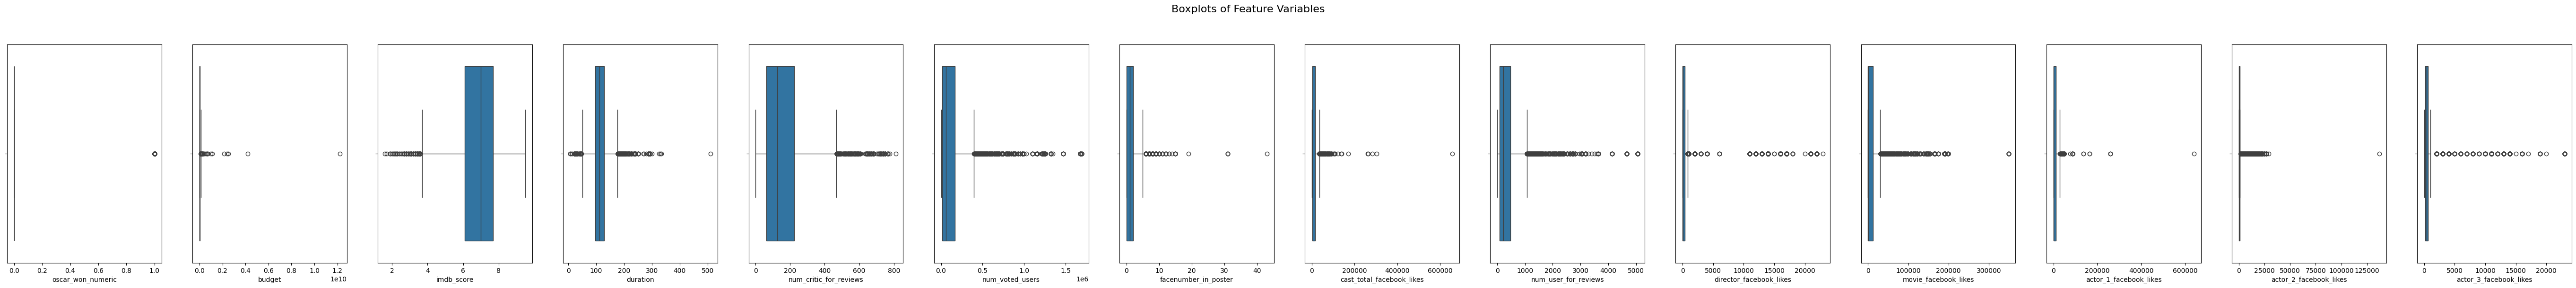

In [322]:
fn.plot_boxplots(merged_df,feat_columns)

In [323]:
# Nans opvullen met mediaan
merged_df['budget'] = merged_df['budget'].fillna(merged_df['budget'].median())
merged_df['duration'] = merged_df['duration'].fillna(merged_df['duration'].median())
merged_df['num_user_for_reviews'] = merged_df['num_user_for_reviews'].fillna(merged_df['num_user_for_reviews'].median())
merged_df['num_critic_for_reviews'] = merged_df['num_critic_for_reviews'].fillna(merged_df['num_critic_for_reviews'].median())

We vullen hier de waardes op met de mediaan van hun kolom. In de boxplots zagen we dat de meeste films ongeveer dezelfde duur hebben, budget, en reviews. Dus vandaar onze keuze.

### Modellen bouwen

Laten we verschillende modellen bouwen. Nu dat we zagen dat we correlerende kolommen hadden kunnen we ook de optie gebruiken om lineaire regressie toe te passen. We gaan deze zometeen vergelijken met de Decision Tree, aangezien de latere ook goed werkt met categoriale data en minder lineair gerelateerde kolommmen.  

In [324]:
# Features voor regressie model
features_lr = [
    'num_critic_for_reviews', 'num_voted_users', 'imdb_score',
    'duration', 'num_user_for_reviews', 'movie_facebook_likes', 'director_oscar_count'
]


# Featrues voor Decision Tree
features_dt = [
    'num_critic_for_reviews', 'duration', 'num_voted_users', 'num_user_for_reviews', 'imdb_score', 
    'budget', 'director_oscar_count', 'movie_facebook_likes',"Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama",
    "Family", "Fantasy", "Film", "Game", "History", "Horror", "Music", "Musical", "Mystery",
    "News", "Romance", "Sci", "Short", "Sport", "Thriller", "War", "Western"
] # Alle , dummies

# Features voor KNN
features_knn = ['num_critic_for_reviews', 'duration', 'num_voted_users', 'num_user_for_reviews', 'imdb_score', 
    'budget', 'director_oscar_count', 'movie_facebook_likes'] # Zonder dummies

target = merged_df['oscar_won_numeric'].astype(int)

### Logistic Regression 
Omdat we nu werken met een categorie en we een simpele ja of nee willen voorspellen zal een Lineaire Regressie model dus niet werken.
Gelukkig is er nog een lineair voorspellend model dat met een categorie kan werken. We gaan deze vergelijken met de andere modellen.

In [325]:
# train LR
X_lr = merged_df[features_lr].astype(int)
X_Lr_train, X_Lr_test, y_Lr_train, y_Lr_test = train_test_split(X_lr, target, test_size=0.2, random_state=42)
lr_model = LogisticRegression()
lr_model.fit(X_Lr_train, y_Lr_train)

C:\Users\pim-d\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### DeciscionTree Classifier
Werkt precies hetzelfde als de decision tree die we in de eerste onderzoeksvraag hadden gebruikt, alleen deze werkt net iets beter dan met binaire waardes dan continue. Speciaal gemaakt voor problemen zoals dit. 

In [326]:
max_depths = np.arange(1, 50) # Dit bepaalt hoe diep/aantal buren ons model zal hebben voor zijn hyperparameter. 

In [327]:
# Split data
X_Dt = merged_df[features_dt]
X_Dt_train, X_Dt_test, y_Dt_train, y_Dt_test = train_test_split(X_Dt,  target, test_size=0.2, random_state=42)

# Maak arrays om elke waarde per diepte op te slaan
test_Dt_accuracies = np.zeros(len(max_depths))
test_Dt_rmse = np.zeros(len(max_depths))

# Loop over de dieptes heen en maak een decision Tree voor elke diepte
for i, d in enumerate(max_depths):
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_Dt_train, y_Dt_train)
    
    # Accuracy berekenen
    test_Dt_accuracies[i] = accuracy_score(y_Dt_test, tree.predict(X_Dt_test))
    
    # RMSE berekenen
    test_Dt_rmse[i] = root_mean_squared_error(y_Dt_test, tree.predict(X_Dt_test))


### KNN-Model
Als laatste model gebruiken we weer de KNN, met dezelfde reden als hierboven. Knn werkt ook goed met non lineaire verbanden en aangezien we daar veel van hebben kunnen we het dus mooi vergelijken met de andere twee modellen die we hebben.

In [328]:
# Split data
X_knn = merged_df[features_knn]
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn,  target, test_size=0.2, random_state=42)

# Maak een scaler aan voor de KNN
scaler_knn = StandardScaler()
X_knn_train_scaled = scaler_knn.fit_transform(X_knn_train)
X_knn_test_scaled  = scaler_knn.transform(X_knn_test)

test_Knn_accuracies = np.zeros(len(max_depths))
test_Knn_rmse = np.zeros(len(max_depths))

for i, k in enumerate(max_depths):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_knn_train_scaled, y_knn_train)
    
    # Accuracy berekenen
    test_Knn_accuracies[i] = accuracy_score(y_knn_test, knn.predict(X_knn_test_scaled))
    
    # RMSE berekenen
    test_Knn_rmse[i] = root_mean_squared_error(y_knn_test, knn.predict(X_knn_test_scaled))


### Baseline vs Prediction
Voor onze baseline pakken we het gemiddeld aantal gewonnen oscars en vergelijken het met onze voorspelling modellen. Uit de piechart zagen we dat ongeveer 13% van alle films een oscar wint, dus dat betekent dat onze modellen boven de 87% moeten scoren.

In [329]:
baseline_mean = merged_df['oscar_won_numeric'].mean() # Het gemiddelde aantal oscars die winnen nemen
baseline_accuracy =  1 - baseline_mean
print("Baseline Accuracy: ", round(baseline_accuracy * 100,2), '%')

# Lr prediction
y_Lr_pred = lr_model.predict(X_Lr_test)
print("Logistic Regression Accuracy:", round((accuracy_score(y_Lr_test, y_Lr_pred)*100),2), '%')

# Dt prediction
print("Decision Tree Accuracy:", round(max(test_Dt_accuracies) * 100, 2), '% Met diepte', np.argmax(test_Dt_accuracies) + 1)

# Knn prediction
print("KNN Accuracy:", round(max(test_Knn_accuracies) * 100,2), '% Met aantal buren', np.argmax(test_Knn_accuracies) + 1)

Baseline Accuracy:  86.95 %
Logistic Regression Accuracy: 86.2 %
Decision Tree Accuracy: 87.26 % Met diepte 8
KNN Accuracy: 87.99 % Met aantal buren 18


### Resultaat van de modellen
We zien hier dat de Decision Tree en KNN boven onze baseline scoren. En KNN heeft zelfs het hoogste gescoord met een buur aantal van 24. 

Laten we de data visualiseren om dieper op de data in te gaan.

### Visualisatie van de modellen

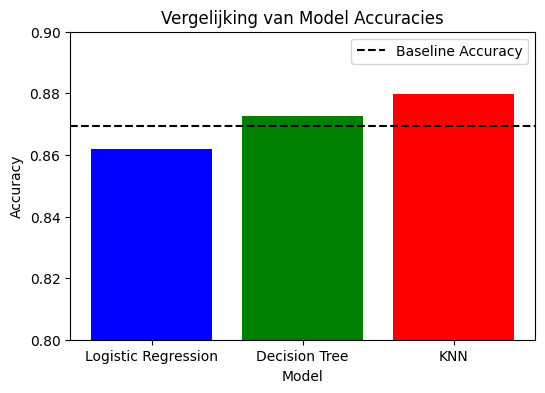

In [330]:
# Modelnamen en hun accuracies
model_names = ["Logistic Regression", "Decision Tree", "KNN"]
accuracies = [
    accuracy_score(y_Lr_test, y_Lr_pred),
    max(test_Dt_accuracies),  # Hoogste accuracy van Decision Tree met optimale hyperparameter
    max(test_Knn_accuracies)  # Hoogste accuracy van KNN met optimale hyperparameter
]

# Plot maken
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.axhline(y=baseline_accuracy, color='black', linestyle='--', label="Baseline Accuracy")

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Vergelijking van Model Accuracies")
plt.ylim(0.8, 0.9)  # Schaal aanpassen zodat verschillen duidelijker zijn
plt.legend()
plt.show()


In [331]:
# Interactieve functie
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact

# Interactieve functie
def plot_interactive(model_type, metric_type, selected_value):
    fig = go.Figure()

    if model_type == 'Decision Tree':
        x_values = max_depths
        title = "Decision Tree: Accuracy/RMSE vs Max Depth"
        label = f"Selected Depth: {selected_value}"
        y_label = "Accuracy (%)" if metric_type == "Accuracy" else "RMSE"

        if metric_type == "Accuracy":
            y_values = [acc * 100 for acc in test_Dt_accuracies]
            selected_y = test_Dt_accuracies[selected_value - 1] * 100
        else:
            y_values = test_Dt_rmse
            selected_y = test_Dt_rmse[selected_value - 1]

    elif model_type == 'KNN':
        x_values = max_depths  # Gebruikt dezelfde max_depths voor een consistente slider
        title = "KNN: Accuracy/RMSE vs Number of Neighbors"
        label = f"Selected Neighbors: {selected_value}"
        y_label = "Accuracy (%)" if metric_type == "Accuracy" else "RMSE"

        if metric_type == "Accuracy":
            y_values = [acc * 100 for acc in test_Knn_accuracies]
            selected_y = test_Knn_accuracies[selected_value - 1] * 100
        else:
            y_values = test_Knn_rmse
            selected_y = test_Knn_rmse[selected_value - 1]

    # Plot de lijn + markers
    fig.add_trace(go.Scatter(x=x_values, y=y_values, 
                             mode='lines+markers', 
                             name=f"{model_type} {metric_type}"))

    # Markeer geselecteerde waarde
    fig.add_trace(go.Scatter(x=[selected_value], y=[selected_y],
                             mode='markers+text',
                             marker=dict(color='red', size=10),
                             text=[f"{selected_y:.2f}" if metric_type == "RMSE" else f"{selected_y:.2f}%"],
                             textposition="top center",
                             name=label))

    fig.update_layout(title=title,
                      xaxis_title="Hyperparameter (Max Depth / Neighbors)",
                      yaxis_title=y_label,
                      template="plotly_white")

    fig.show()

# Widgets voor interactie
interact(plot_interactive, 
         model_type=widgets.Dropdown(options=['Decision Tree', 'KNN'], value='Decision Tree', description="Model Type"),
         metric_type=widgets.Dropdown(options=['Accuracy', 'RMSE'], value='Accuracy', description="Metric"),
         selected_value=widgets.IntSlider(min=1, max=len(max_depths), step=1, value=1, description="Select Value"))

plt.show()

interactive(children=(Dropdown(description='Model Type', options=('Decision Tree', 'KNN'), value='Decision Tre…

## Conclusie onderzoeksvraag 2

Als antwoord op de onderzoeksvraag: Ja, het is zeker mogelijk om te voorspellen of een film een oscar wint of niet.
Voor de meeste accuracay kun het KNN-model gebruiken met een score van 87.99%! Voor de hyperparameters geldt dat 18 buren het beste werkt.
Voor de DT is het een diepte van 8. 

Door de lage correlatie scores zijn we niet verbaasd dat de logistische regressie minder goed heeft gescoord dan de rest, maar kwam alsnog aardig in de buurt. Voor nu is het duidelijk om te zien dat ookal is er een lage correlatie kunnen DT en KNN alsnog er goed scoren. 

## Onderzoeksvraag 3: Hoe kunnen budget en omzet worden gebruikt om logische clusters van de films te vinden?


Om clusters te bepalen in een dataset gaan we nu gebruik maken van unsupervised learning. De algoritmes die we gaan toepassen zijn KMeans en GMM.

We maken een nieuw dataframe aan met 'gross' en 'budget'.

In [332]:
df_gross_budget = dfr[['gross', 'budget']]

Bekijken hoeveel NaN values in de dataset voorkomen.

In [333]:
df_gross_budget.isna().sum()

gross     884
budget    492
dtype: int64

Bekijken hoeveel rows het volledige df bevat. Als de NaN waardes maar een klein percentage van de volledige dataset bevat kunnen deze worden verwijderd. Als het een groot percentage bevat dan moeten we kijken of we dit logisch in kunnen vullen


aantal rows in de totale datasframe: 5043
aantal nan rows in de totale datasframe: 1152
Bevat NaN rows t.o.v. totale dataframe: 22.8%


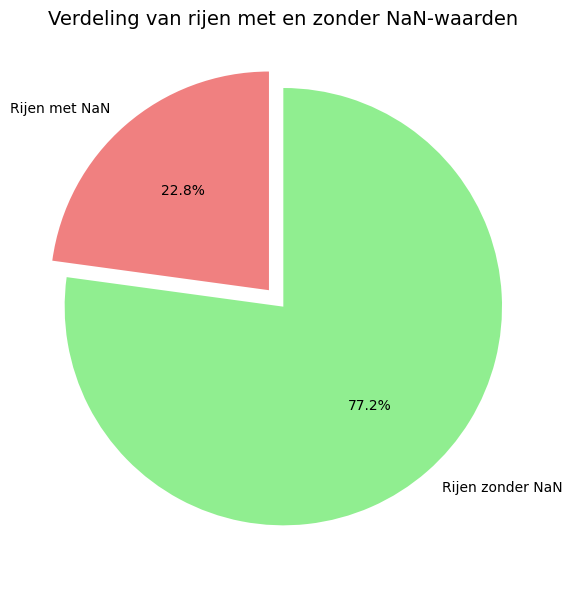

In [334]:
total_rows = len(df_gross_budget)
print(f'aantal rows in de totale datasframe: {total_rows}')
nan_rows = df_gross_budget.isna().any(axis=1).sum()
print(f'aantal nan rows in de totale datasframe: {nan_rows}')
nan_percentage_rows = ((nan_rows / total_rows) * 100).round(1)
print(f'Bevat NaN rows t.o.v. totale dataframe: {nan_percentage_rows}%')

# Plotten
labels = ['Rijen met NaN', 'Rijen zonder NaN']
values = [nan_rows, total_rows - nan_rows]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'], explode=[0.1, 0])
plt.title('Verdeling van rijen met en zonder NaN-waarden', fontsize=14)
plt.tight_layout()
plt.show()

Dit is een aanzienlijk groot percentage NaN's. We gaan de data opvullen. Maar eerst moeten we bekijken welke kolommen uit de dataset het meest correleren. De kolommen die het meest correleren met gross en budget kunnen worden gebruikt om de missende data in te vullen.


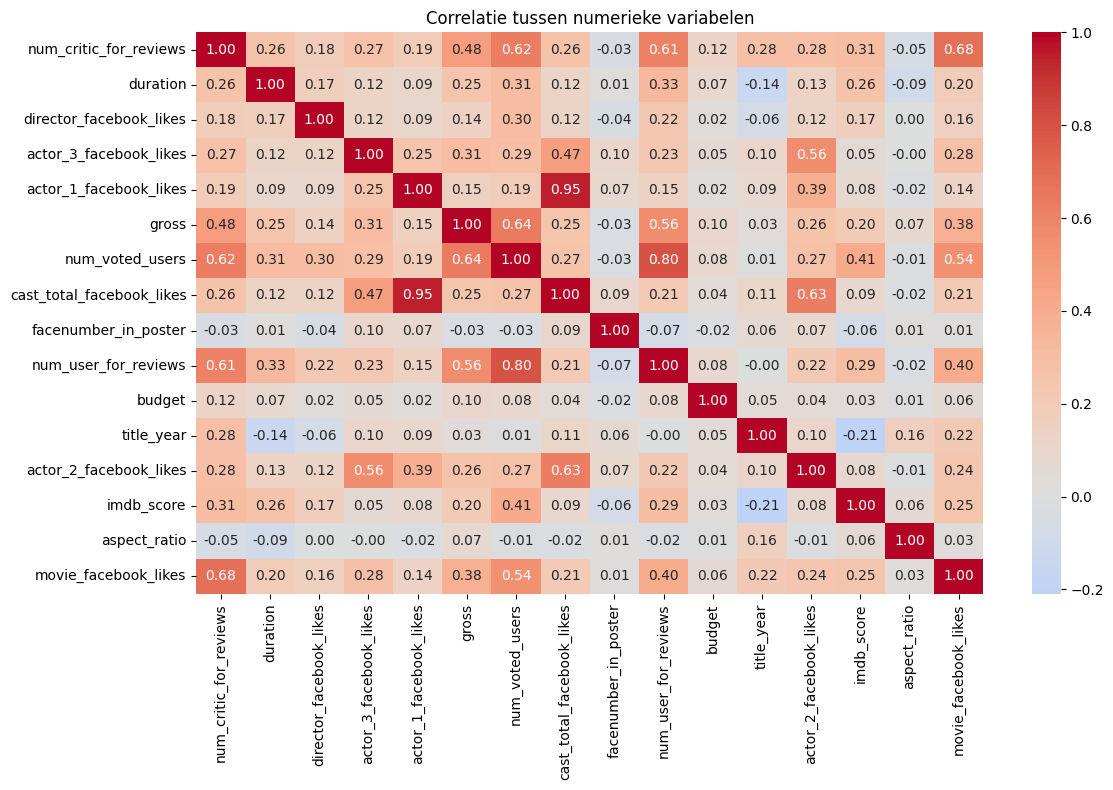


Top 5 correlaties met budget:
budget                   1.00
num_critic_for_reviews   0.12
gross                    0.10
num_user_for_reviews     0.08
num_voted_users          0.08
Name: budget, dtype: float64

Top 5 correlaties met gross:
gross                    1.00
num_voted_users          0.64
num_user_for_reviews     0.56
num_critic_for_reviews   0.48
movie_facebook_likes     0.38
Name: gross, dtype: float64


In [335]:
# Selecteer numerieke kolommen
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Mask alle andere correlaties behalve bij de kolommen budget en gross
mask = np.full(correlation_matrix.shape, True)
cols_to_show = ['budget', 'gross']

for col in cols_to_show:
    mask[:, numeric_columns.get_loc(col)] = False  # Toon geselecteerde kolommen
    mask[numeric_columns.get_loc(col), :] = False  # Toon geselecteerde rijen

# Plot correlatie heatmap met gemaskeerde waarden
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            mask=mask,
            cmap='coolwarm', 
            center=0, 
            fmt='.2f', 
            linewidths=0.5, 
            linecolor='gray')

plt.title('Correlatie tussen numerieke variabelen')
plt.tight_layout()
plt.show()

# Print de top 5 correlaties met budget en gross
print("\nTop 5 correlaties met budget:")
budget_correlations = correlation_matrix['budget'].sort_values(ascending=False)
print(budget_correlations.head())

print("\nTop 5 correlaties met gross:")
gross_correlations = correlation_matrix['gross'].sort_values(ascending=False)
print(gross_correlations.head())


De enige matige correlaties zijn tussen de gross en num_voted_users en num_users_for_reviews. We zullen deze 2 kolommen gebruiken om de missende NaN values in te vullen van gross. 


In [336]:
# Vul missende waarden van 'gross' in op basis van gemiddelden per cluster
# Cluster bepalen op basis van 'num_voted_users' en 'num_user_for_reviews'

# Maak een nieuwe kolom voor clustering (bijvoorbeeld afronden van aantallen gebruikers)
df['cluster'] = (
    df['num_voted_users'].fillna(0).round(-3).astype(int).astype(str) + '_' +
    df['num_user_for_reviews'].fillna(0).round(-2).astype(int).astype(str)
)

# Bereken gemiddelde 'gross' per cluster
cluster_gross_mean = df.groupby('cluster')['gross'].mean()

# Vul NaN-waarden van 'gross' in met de gemiddelden per cluster
df['gross'] = df.apply(
    lambda row: cluster_gross_mean[row['cluster']] if pd.isna(row['gross']) else row['gross'],
    axis=1
)

# Verwijder tijdelijke clusterkolom
df.drop(columns=['cluster'], inplace=True)


Weer opnieuw een dataframe maken met alleen gross en budget maar dan met de ingevulde gross kolom.

In [337]:
df = df[['gross', 'budget']]

Weer alle NaN values checken

In [338]:
df.isna().sum()

gross      23
budget    492
dtype: int64

Opnieuw bekijken hoeveel procent NaN waarden bevat.

aantal rows in de totale datasframe: 5043
aantal nan rows in de totale datasframe: 510
Bevat NaN rows t.o.v. totale dataframe: 10.1%


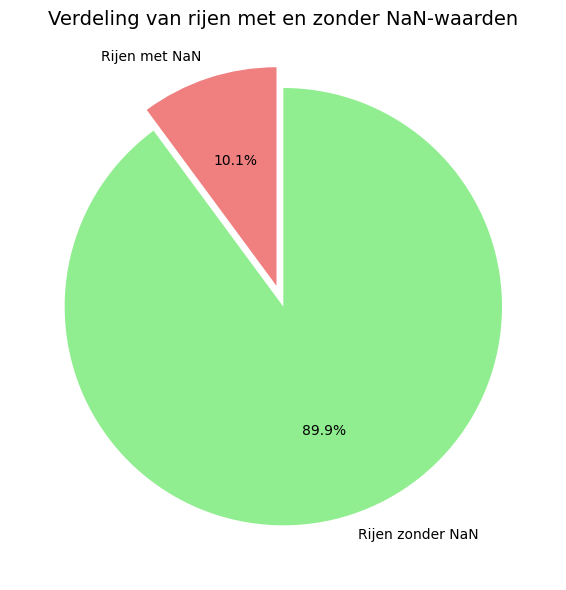

In [339]:
total_rows = len(df)
print(f'aantal rows in de totale datasframe: {total_rows}')
nan_rows = df.isna().any(axis=1).sum()
print(f'aantal nan rows in de totale datasframe: {nan_rows}')
nan_percentage_rows = ((nan_rows / total_rows) * 100).round(1)
print(f'Bevat NaN rows t.o.v. totale dataframe: {nan_percentage_rows}%')

# Plotten
labels = ['Rijen met NaN', 'Rijen zonder NaN']
values = [nan_rows, total_rows - nan_rows]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'], explode=[0.1, 0])
plt.title('Verdeling van rijen met en zonder NaN-waarden', fontsize=14)
plt.tight_layout()
plt.show()

We hebben het aantal NaN values verlaagd van 22.8% tot 10.1%. Dit is nogsteeds relatief veel maar helaas is er weinig correlatie met de budget kolom waardoor we deze niet verder in kunnen vullen. Daarom kiezen we ervoor om de resterende NaN waarden te verwijderen.

Alle NaN's verwijderen

In [340]:
df = df.dropna()

Opnieuw bekijken hoeveel NaN's in de dataset voorkomen. Na het verwijderen ervan moeten ze voor allebei op 0 staan.

In [341]:
df.isna().sum()

gross     0
budget    0
dtype: int64

In [ ]:
total_rows = len(df)
print(f'aantal rows in de totale datasframe: {total_rows}')
nan_rows = df.isna().any(axis=1).sum()
print(f'aantal nan rows in de totale datasframe: {nan_rows}')
nan_percentage_rows = ((nan_rows / total_rows) * 100).round(1)
print(f'Bevat NaN rows t.o.v. totale dataframe: {nan_percentage_rows}%')

# Plotten
labels = ['Rijen met NaN', 'Rijen zonder NaN']
values = [nan_rows, total_rows - nan_rows]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'], explode=[0.1, 0])
plt.title('Verdeling van rijen met en zonder NaN-waarden', fontsize=14)
plt.tight_layout()
plt.show()

## Kolom statistieken bekijken

We hebben te maken met een nieuwe kolom budget. Hiervan gaan we de spreiding bekijken.

In [ ]:
df[['budget']].describe()

In [ ]:
df[['gross']].describe()

Wat opvalt is dat de mediaan van budget op 20 staat en het gemiddelde op 39,9. Van gross is dit 22,3 en 45,5. Dit betekent dat het gemiddelde heel erg omhoog wordt gehaald door extreme uitschieters bij beide kolommen. Hier moet wat aan gedaan worden zoals outliers verwijderen

## Verwijderen van outliers ##

Omdat de modellen gevoelig zijn voor outliers gaan we identificeren welke we gaan verwijderen.

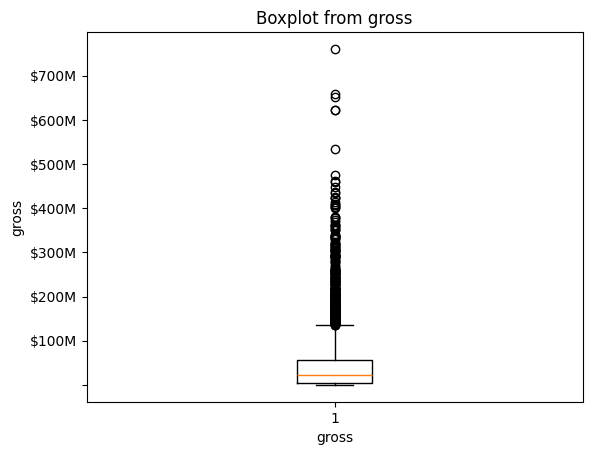

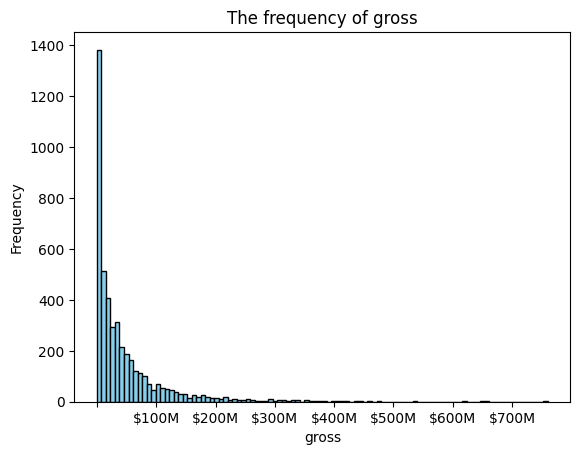

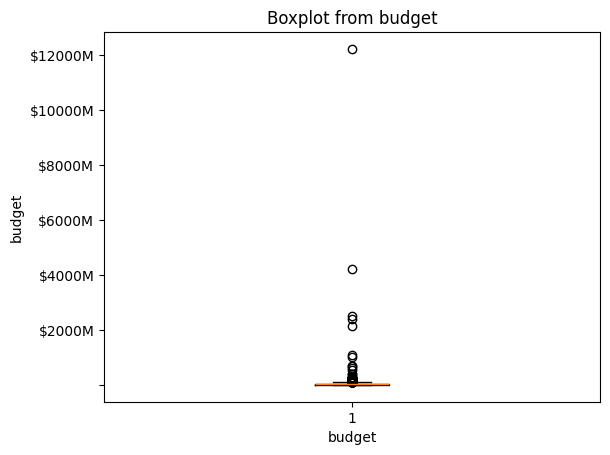

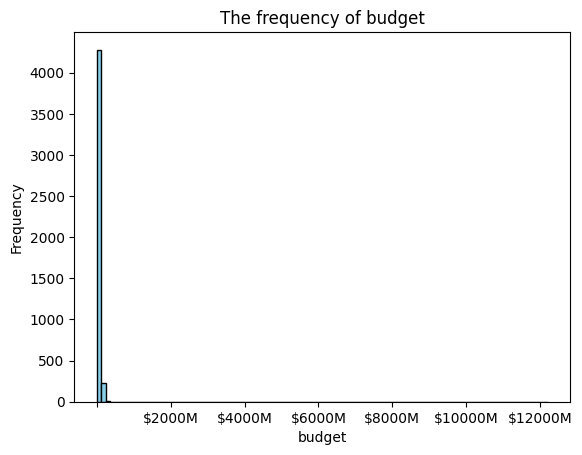

In [343]:
fn.boxplot_gross_and_budget(df, 'gross')
fn.histogram_gross(df, 'gross')

fn.boxplot_gross_and_budget(df, 'budget')
fn.histogram_gross(df, 'budget')

Als we kijken naar een combinatie van de boxplots en histogrammen, dan zien we dat er extreme outliers in onze dataset voorkomen. Onze onderzoeksvraag vraagt niet om bijzondere gevallen te bepalen, maar om logische clusters te bepalen, wat na verwijderen van de outliers in theorie nogsteeds kan worden gedaan. Hierdoor besluiten we alle outliers te verwijderen uit onze dataset. Hierbij maken we gebruik van de functies uit functies.py. Ook bekijken we het aantal rijen en kolommen voordat we ze gaan verwijderen om te checken of ze echt zijn verwijderd.

In [344]:
df.shape

(4533, 2)

In [345]:
df = fn.remove_outliers(df, 'gross')
df = fn.remove_outliers(df, 'budget')

Checken of de outliers zijn verwijderd door het aantal rijen en kolommen te bekijken. Dit is inderdaad een lager getal dan eerst, wat betekend dat ze zijn verwijderd.

In [346]:
df.shape

(3938, 2)

Ook bekijken we de histogrammen opnieuw. De x as moet een bereik hebben wat overeenkomt met wat we op de boxplots zagen. 

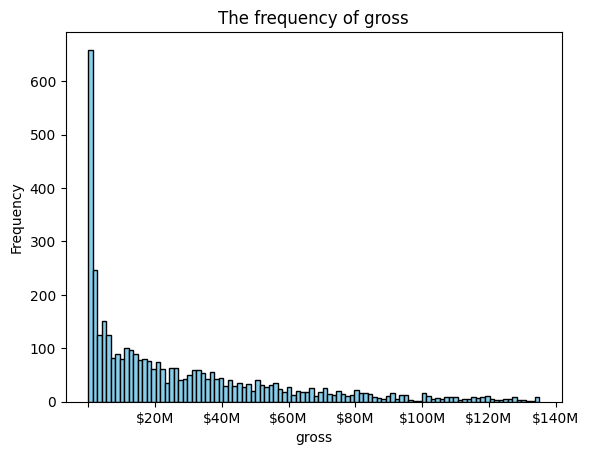

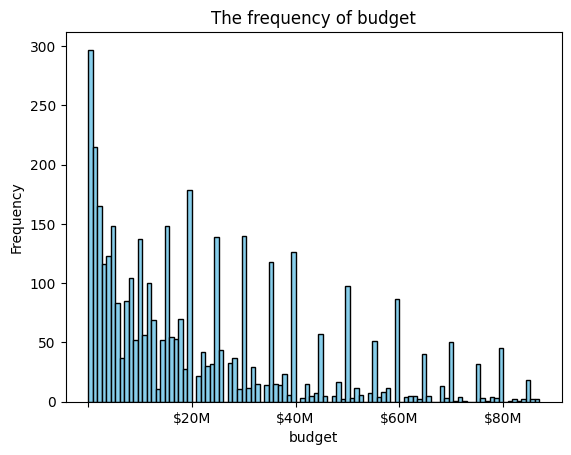

In [347]:
fn.histogram_gross(df, 'gross')
fn.histogram_gross(df, 'budget')

Het bereik op de x as komt inderdaad overeen met wat we zagen in de boxplots voordat we de outliers hebben verwijderd.

Nu gaan we kijken of er na opvulling en opschoning van onze dataset logische clusters kunnen worden bepaald met unsupervised learning. De 2 modellen die we gebruiken zijn kmeans en gmm. We gebruiken deze 2 modellen omdat ze relatief eenvoudig, efficiënt en effectief zijn bij het vinden van clusters in onze continueu data. Kmeans kan goed voor bolvormige clusters modelleren en gmm kan goed verschillende vormen moddeleren doordat het flexibeler is.

In [348]:
# Code afkomstig van les CM10
# kMeans en GMM maken gebruik van afstandsmaten, daarom is standaardiseren belangrijk
df.reset_index(inplace = True)

# We passen scaling toe zodat de afstandmaten beter zijn verdeeld onder elkaar.
scaler = StandardScaler()
scaler.fit(df[['gross', 'budget']])
df_z = pd.DataFrame(scaler.transform(df[['gross', 'budget']]), columns=['gross_z', 'budget_z'])
df[['gross_z', 'budget_z']] = df_z

Kijken of de correcte kolommen zijn aangemaakt. gross_z en budget_z zijn inderdaad aangemaakt.

In [349]:
df.head(5)

index          gross        budget  gross_z  budget_z
0    177  16,523,776.26  1,500,000.00    -0.37     -0.98
1    214 119,412,921.00 65,000,000.00     3.03      2.08
2    215  32,694,788.00 85,000,000.00     0.16      3.05
3    242  46,314,723.00 78,000,000.00     0.61      2.71
4    306  66,862,068.00 83,000,000.00     1.29      2.95

## Moddeleren

We gaan als eerst KMeans toepassen op onze dataset en bekijken welke clusters dit moddeleert. We kiezen hier handmatig 5 clusters. Dit doen we omdat onze hoofdvraag vraagt om 5 clusters: blockbuster films, flop films, cult films, mid range films en rest van de films.

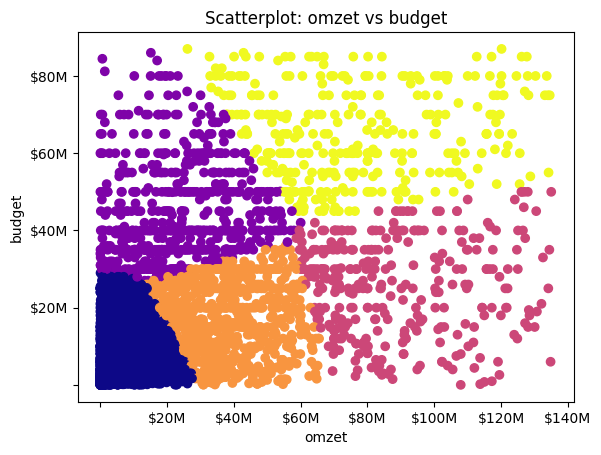

In [350]:
# Maken van een willekeurige clustering
model_kMeans = KMeans(n_clusters=5, random_state=0)
X_kMeans = df[['gross_z', 'budget_z']]

# Clusters 'voorspellen' en opslaan
prediction_kMeans = model_kMeans.fit_predict(X_kMeans)
df['cluster_number'] = model_kMeans.predict(X_kMeans)

# Plotten van 'omzet' en 'budget' en als kleur de clusters
plt.scatter(df['gross'], df['budget'], c=df['cluster_number'], cmap='plasma')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.title('Scatterplot: omzet vs budget')
plt.xlabel('omzet')
plt.ylabel('budget')
plt.show()

Als we naar de plot kijken zien we dat KMeans geen logische clusters kan vormen. Alle kleuren staan gegroupeerd bij elkaar maar er zit geen logica in. Dat zie je door de rechthoekige vormen van de clusters. Helaas geeft dit ook geen clusters die overeenkomen met de 5 soorten films uit onze hoofdvraag maar het komt wel in de buurt. Het kan dus geen logische clusters vormen als we puur kijken naar hoe KMeans werkt, maar het kan wel redelijk logische clusters vormen in combinatie met onze onderzoeksvraag. 

Om nog even bij KMeans te blijven gaan we hier de 'elbow method' toepassen. Dit doen we omdat dit het punt is waar het toevoegen van extra clusters nauwelijks meer leidt tot een significante verbetering in de clusteringkwaliteit. Als de 'knik' valt op 5 weten we dat dit het optimale punt is om te zoeken naar clusters.

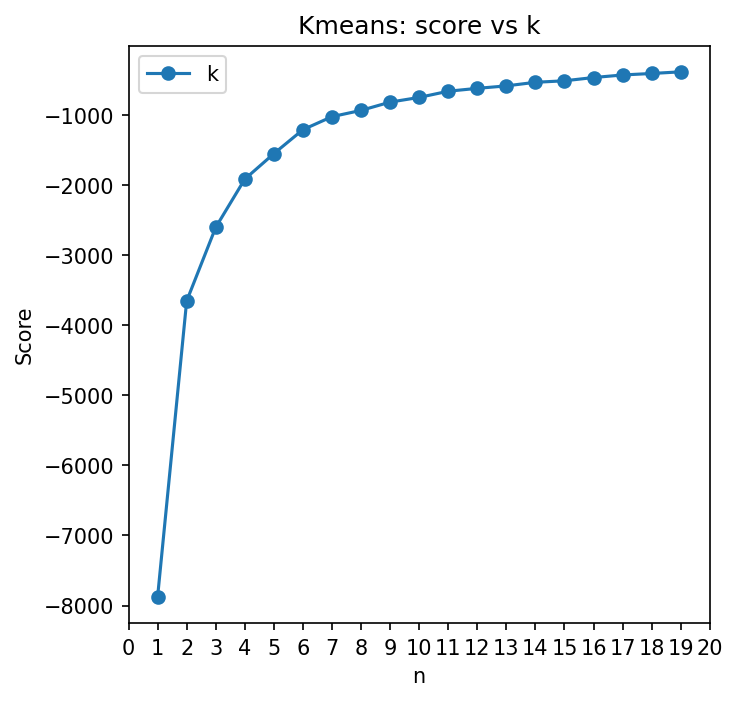

In [351]:
# Code afkomstig van les CM10

data = []

max_k = 20

for i in range(1, max_k):
    model_kMeans = KMeans(n_clusters=i, random_state=0)
    X_kMeans = df[['gross_z', 'budget_z']]

    # Clusters 'voorspellen' en opslaan
    model_kMeans.fit(X_kMeans)

    data.append([i, model_kMeans.score(X_kMeans)])

df_plot_kmeans = pd.DataFrame(data, columns=['k', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.axes()

ax.set(xlim=(0,max_k),
       xlabel='n',
       ylabel='Score',
       title='Kmeans: score vs k')

ax.xaxis.set_major_locator(plt.MaxNLocator(max_k))
ax.ticklabel_format(useOffset=False)
ax.plot(df_plot_kmeans['k'], df_plot_kmeans['Score'], '-o')

ax.legend(['k'])

Als we kijken naar de plot van de 'elbow method' zien we dat de 'knik' zit bij n=2. Dit punt geeft de optimale balans in modelcomplexiteit en clusteringkwaliteit. De knik valt dus niet op 5, wat betekend dat we eerder met n=5 hebben overclusterd. Dit betekent niet dat we met n=2 ineens logische clusters gaan vinden, maar wel dat het eerder met n=5 overcomplexe clusters probeert te vinden zonder dat de kwaliteit van de clusters omhoog gaat. Hieronder plotten we de optimale balans met n=2.

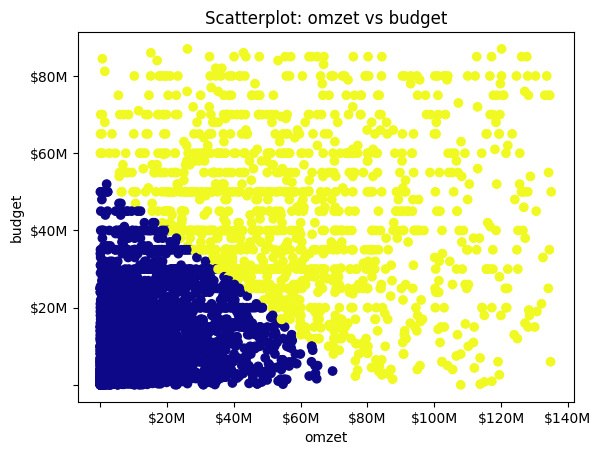

In [352]:
# Maken van een willekeurige clustering
model_kMeans = KMeans(n_clusters=2, random_state=0)
X_kMeans = df[['gross_z', 'budget_z']]

# Clusters 'voorspellen' en opslaan
prediction_kMeans = model_kMeans.fit_predict(X_kMeans)
df['cluster_number'] = model_kMeans.predict(X_kMeans)

# Plotten van 'omzet' en 'budget' en als kleur de clusters
plt.scatter(df['gross'], df['budget'], c=df['cluster_number'], cmap='plasma')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.title('Scatterplot: omzet vs budget')
plt.xlabel('omzet')
plt.ylabel('budget')
plt.show()

Ook dit geeft weer geen logische clusters omdat het weer rechthoekige clusters vormt omdat de data niet bolvormig is. Een laag budget valt hier bijvoorbeeld in lage omzet maar ook in hoge omzet.

Nu gaan we hetzelfde doen maar dan met GMM.

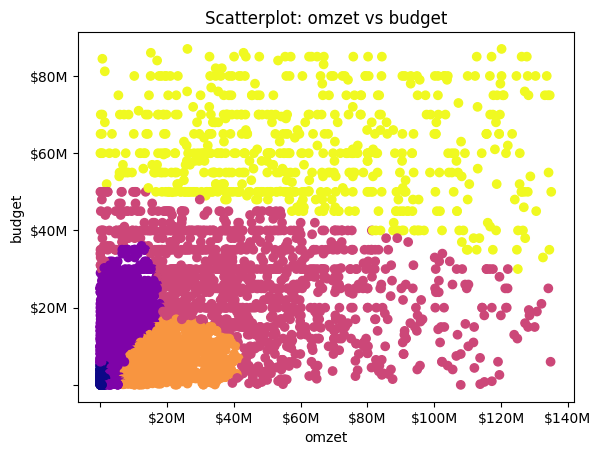

In [353]:
# Maken van een willekeurige clustering
model_gmm = gmm(n_components=5, random_state=0)
X_gmm = df[['gross_z', 'budget_z']]

# Clusters 'voorspellen' en opslaan
prediction_gmm = model_gmm.fit_predict(X_gmm)
df['cluster_number'] = model_gmm.predict(X_gmm)

# Plotten van 'omzet' en 'budget' en als kleur de clusters
plt.scatter(df['gross'], df['budget'], c=df['cluster_number'], cmap='plasma')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.title('Scatterplot: omzet vs budget')
plt.xlabel('omzet')
plt.ylabel('budget')
plt.show()

Ook hier zie je dat het clusters maakt die niet logisch zijn en weer niet slaan op onze hoofdvraag. Je ziet bijvoorbeeld de kleur geel met een hoog budget wat weer lage omzet en hoge omzet kan hebben. De vormen zijn wat flexibeler en rondvormig, wat een kenmerk is van gmm.

Dan gaan we kijken naar de elbow method voor gmm.

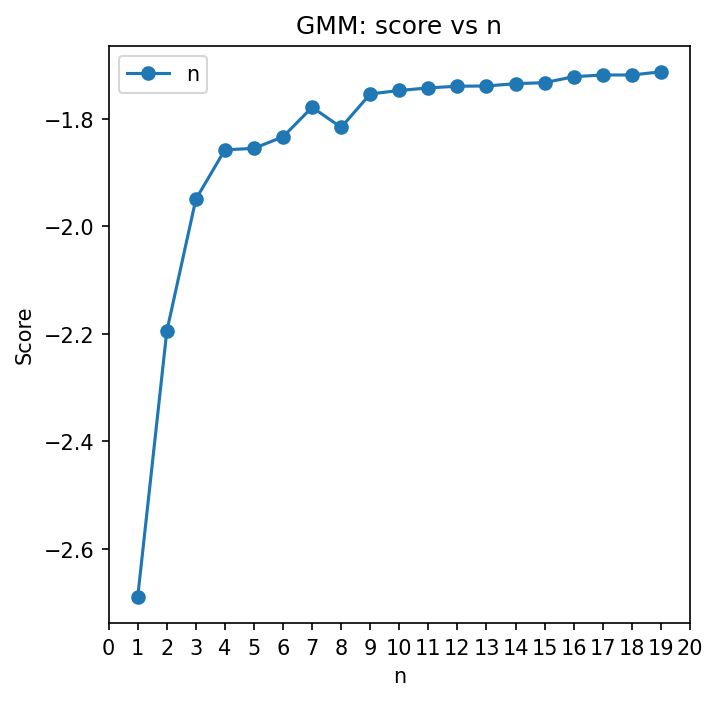

In [354]:
# Code afkomstig van les CM10
data = []

max_n = 20

for i in range(1, max_k):
    model_gmm = gmm(n_components=i, random_state=0)
    X_gmm = df[['gross_z', 'budget_z']]

    prediction_gmm = model_gmm.fit(X_gmm)
    data.append([i, model_gmm.score(X_gmm)])

df_plot_gmm = pd.DataFrame(data, columns=['n', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='n',
       ylabel='Score',
       title='GMM: score vs n')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.ticklabel_format(useOffset=False)
ax.plot(df_plot_gmm['n'], df_plot_gmm['Score'], '-o')

ax.legend(['n'])

De knik bij de elbow method voor gmm zit op 4. Dit punt geeft de optimale balans in modelcomplexiteit en clusteringkwaliteit. De knik valt dus niet op 5, wat betekend dat we eerder met n=5 hebben overclusterd. Dit betekent niet dat we met n=4 ineens logische clusters gaan vinden, maar wel dat het eerder met n=5 overcomplexe clusters probeert te vinden zonder dat de kwaliteit van de clusters omhoog gaat. Hieronder plotten we de optimale balans met n=4.

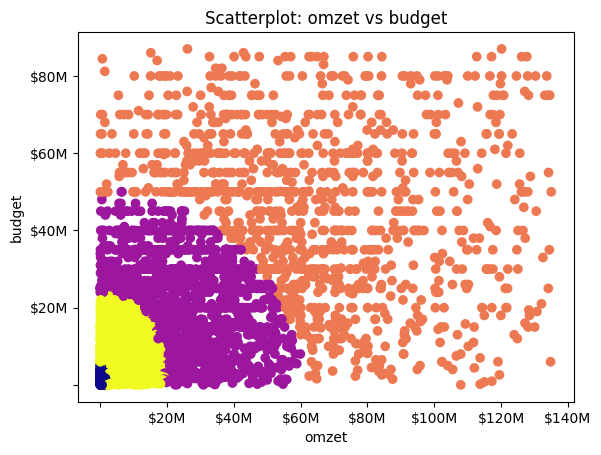

In [355]:
# Maken van een willekeurige clustering
model_gmm = gmm(n_components=4, random_state=0)
X_gmm = df[['gross_z', 'budget_z']]

# Clusters 'voorspellen' en opslaan
prediction_gmm = model_gmm.fit_predict(X_gmm)
df['cluster_number'] = model_gmm.predict(X_gmm)

# Plotten van 'omzet' en 'budget' en als kleur de clusters
plt.scatter(df['gross'], df['budget'], c=df['cluster_number'], cmap='plasma')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.title('Scatterplot: omzet vs budget')
plt.xlabel('omzet')
plt.ylabel('budget')
plt.show()

Ook hier zie je dat het clusters maakt die niet logisch zijn en weer niet slaan op onze hoofdvraag. Zoals je kan zien zijn er films met een hoog budget die een lage en hoge omzet hebben en vice versa.

Natuurlijk zouden we dit zelf wel kunnen maken op basis van een paar regels, namelijk:

Het opdelen van de films in 5 categorieën.

1. Blockbuster: hoog budget met hoge omzet
2. Flop: hoog budget met lage omzet
3. Cultfilm: laag budget met hoge omzet
4. Mid-Range Movie: Gemiddeld budget met gemiddelde omzet
5. Average: Alle andere gevallen

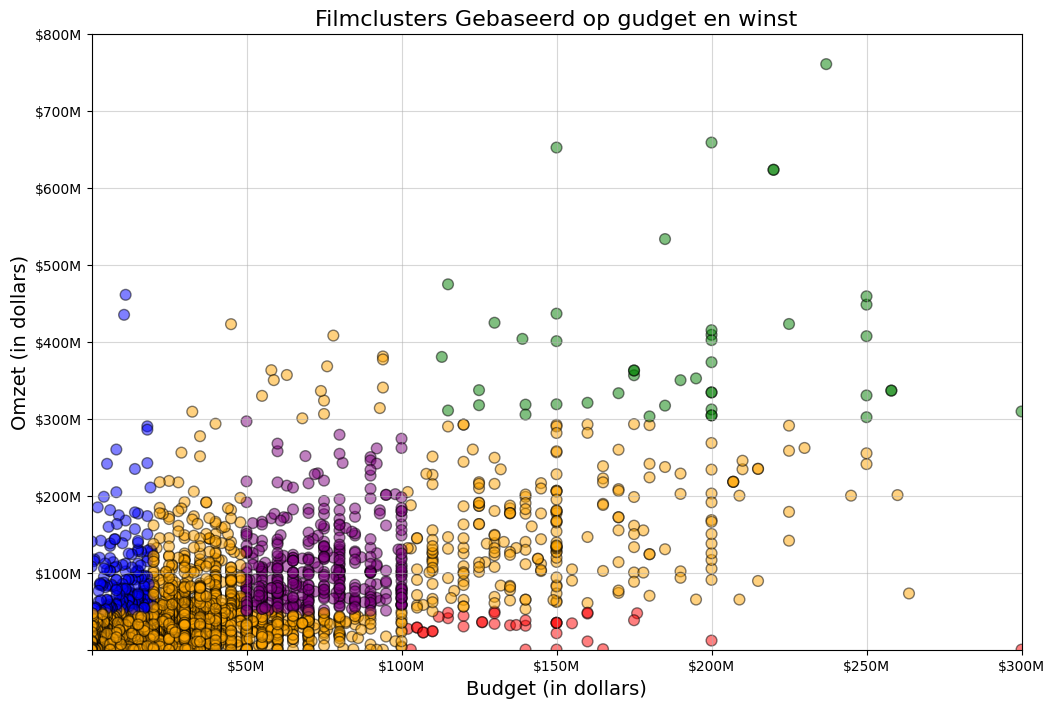

In [356]:
# In volledige dataFrame, alle NaN waarde verwijderen van budget en gross.
df = dfr[['budget', 'gross']].dropna()

# Extreme waarde van budget en gross worden ook verwijderd.
df = df[(df['budget'] < 350000000) & (df['gross'] < 1000000000)] \

# Zie functies.py voor de functie classify_movie
df['Category'] = df.apply(fn.classify_movie, axis=1)

# Scatterplot Visualiseren met kleur
plt.figure(figsize=(12, 8))
colors = {'Blockbuster':'green', 'Flop':'red', 'Cultfilm':'blue', 'Average':'orange', 'Mid-Range Movie':'purple'}
scatter = plt.scatter(df['budget'], df['gross'], 
                      c=df['Category'].map(colors), alpha=0.5, s=60, edgecolor='k', marker='o')

# Titel en labels
plt.title('Filmclusters Gebaseerd op gudget en winst', fontsize=16)
plt.xlabel('Budget (in dollars)', fontsize=14)
plt.ylabel('Omzet (in dollars)', fontsize=14)

# Weergavegrenzen
plt.xlim(0, 300000000)  
plt.ylim(0, 800000000) 

# Grafiek lijn
plt.grid(True, linestyle='-', alpha=0.5)

plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))

plt.show()

**Kleur en kermerken van de clusters in de scatterplot**

- **Groen: blockbuster films**

Deze films zijn met een hoog budget (> 100 miljoen dollar) en met een hoge omzet (>300 miljoen dollar).

We zien groene cluster rechterboven in de grafiek. De succesvolle films.


- **Rood: flop films**

Deze films zijn met een hoog budget (> 100 miljoen dollar) en met een lage omzet (<50 miljoen dollar).

We zien rode cluster rechtsonder in de grafiek. Deze is een klein cluster.


- **Blauw: cultfilms**

Deze films zijn met een laag budget (<20 miljoen dollar) en met een relatief hoge omzet (>50 miljoen dollar).

We zien blauwe cluster linkerboven in de grafiek. Dit cluster laten zien de films met een laag budget toch tot een groot succes kan zijn.


- **Paars: mid range films**

Deze films zijn met een middelgroot budget (50-100 miljoen dollar) en met een middelgroot omzet (50-300 miljoen dollar).

We zien paarse cluster midden in de grafiek. Deze is een groot cluster, betekent er zijn heel veel prima films.


- **Orange: rest van de films**

Alle film die niet in bovenstaande categorieën.

We zien orange cluster verspreid over de grafiek. Er zijn heel veel films die gewoon middelmatige resultaten halen, dus niet te ondersheiden in budget of omzet.



## Conclusie onderzoeksvraag 3


Door middel van unsupervised learning kunnen er geen logische clusters gemaakt worden. Alle 2 de modellen presteren hier redelijk slecht in. Dit komt vooral door de natuur van de KMeans en GMM modellen die vooral bolvormige en elipse vormige cluster kunnen vinden. De meest logische clustering op basis van onze onderzoeksvraag wat gaat over blockbusters, flops, cults, mid range en de rest van de films is die van KMeans op n=5.

We kunnen wel door middel van rule based tabellen een logische cluster maken. Maar goed, dat is supervised en niet unsupervised learning.

Het is dus niet mogelijk om logische clusters te vinden met onze unsupervised technieken, maar de meest logische clustering wordt gevormd met KMeans op n=5.